In [1]:
#import requests
#import bs4
#from bs4 import BeautifulSoup
from tqdm import tqdm

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", 3))

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#from sklearn.pipeline import Pipeline
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor  

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", 3))

import warnings
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

from ipywidgets import *
from IPython.display import display
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(9, 7))
sns.set(font_scale=1.5)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

warnings.simplefilter('ignore')

from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor

pd.set_option('display.max_columns', 500)   # to display 500 columns
pd.set_option('display.max_rows', 500) # to display 500 rows

import time
from datetime import datetime

In [2]:
import psycopg2

# DSN (data source name) format for database connections:  
# [protocol / database  name]://[username]:[password]@[hostname / ip]:[port]/[database name here]


# on your computer you are the user postgres (full administrative access)
db_user = 'postgres'
# if you need a password to access a database, put it here
db_password = ''
# on your computer, use localhost
db_host = 'localhost'
# the default port for postgres is 5432
db_port = 5432
# we want to connect to the northwind database
database =   'cms_claims' # 'cms_medicare_claims'  #

conn_str = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{database}'
conn = psycopg2.connect(conn_str)

In [3]:
# Check Tables in the Database
query = """
SELECT tablename 
FROM pg_catalog.pg_tables 
WHERE schemaname='public'
"""

pd.read_sql(query, con=conn)

tablename
0             icd9_diagonsis
1            beneficiary2008
2            beneficiary2009
3            beneficiary2010
4   prescription_drug_events
5             carrier_claims
6            icd9_procedures
7                      hcpcs
8             final2008_2009
9           inpatient_claims
10         outpatient_claims

In [4]:
# Replacing  Nulls with 0

query = """

SELECT 

     "DESYNPUF_ID"
    , "BENE_BIRTH_DT"
    , COALESCE("BENE_DEATH_DT", '2100-01-01') as "BENE_DEATH_DT"
    , COALESCE("BENE_SEX_IDENT_CD", 0) as "BENE_SEX_IDENT_CD"
    , COALESCE("BENE_RACE_CD", 0) as "BENE_RACE_CD"
    , cast((CASE when "END_STAGE_RENAL2008" like 'Y' then '1' else '0' END) as int) as "END_STAGE_RENAL2008"
    , cast((CASE when "END_STAGE_RENAL2009" like 'Y' then '1' else '0' END) as int) as "END_STAGE_RENAL2009"
    , COALESCE("SP_ALZHDMTA2008", 0) as "SP_ALZHDMTA2008"
    , COALESCE("SP_ALZHDMTA2009", 0) as "SP_ALZHDMTA2009"
    , COALESCE("SP_CHF2008", 0) as "SP_CHF2008"
    , COALESCE("SP_CHF2009", 0) as "SP_CHF2009"
    , COALESCE("SP_CHRNKIDN2008", 0) as "SP_CHRNKIDN2008"
    , COALESCE("SP_CHRNKIDN2009", 0) as "SP_CHRNKIDN2009"
    , COALESCE("SP_CNCR2008", 0) as "SP_CNCR2008"
    , COALESCE("SP_CNCR2009", 0) as "SP_CNCR2009"
    , COALESCE("SP_COPD2008", 0) as "SP_COPD2008"
    , COALESCE("SP_COPD2009", 0) as "SP_COPD2009"
    , COALESCE("SP_DEPRESSN2008", 0) as "SP_DEPRESSN2008"
    , COALESCE("SP_DEPRESSN2009", 0) as "SP_DEPRESSN2009"
    , COALESCE("SP_DIABETES2008", 0) as "SP_DIABETES2008"
    , COALESCE("SP_DIABETES2009", 0) as "SP_DIABETES2009"
    , COALESCE("SP_ISCHMCHT2008", 0) as "SP_ISCHMCHT2008"
    , COALESCE("SP_ISCHMCHT2009", 0) as "SP_ISCHMCHT2009"
    , COALESCE("SP_OSTEOPRS2008", 0) as "SP_OSTEOPRS2008"
    , COALESCE("SP_OSTEOPRS2009", 0) as "SP_OSTEOPRS2009"
    , COALESCE("SP_RA_OA2008", 0) as "SP_RA_OA2008"
    , COALESCE("SP_RA_OA2009", 0) as "SP_RA_OA2009"
    , COALESCE("SP_STRKETIA2008", 0) as "SP_STRKETIA2008"
    , COALESCE("TOTAL_DIAGNOSIS2008", 0) as "TOTAL_DIAGNOSIS2008"
    , COALESCE("TOTAL_DIAGNOSIS2009", 0) as "TOTAL_DIAGNOSIS2009"
    , COALESCE("TOTAL_PAYMENT2008", 0) as "TOTAL_PAYMENT2008"
    , COALESCE("TOTAL_PAYMENT2009", 0) as "TOTAL_PAYMENT2009"
    , COALESCE("CHANGE_IN_PAYMEMT", 0) as "CHANGE_IN_PAYMEMT"
    , COALESCE("CHANGE_IN_DIANOSIS", 0) as "CHANGE_IN_DIAGNOSIS"
    , COALESCE("DEAD", 0) as "DEAD"
    , COALESCE("AGE", 0) as "AGE"
    , COALESCE("LOS", 0) as "LOS"
    , COALESCE("NUM_INPT_ADM", 0) as "NUM_INPT_ADM"
    , COALESCE("TOTAL_INPT_COST", 0) as "TOTAL_INPT_COST"
    , COALESCE("TOTAL_INPT_DIAGNOSIS", 0) as "TOTAL_INPT_DIAGNOSIS"
    , COALESCE("TOTAL_INPT_PROCS", 0) as "TOTAL_INPT_PROCS"
    , COALESCE("READMIT7", 0) as "READMIT7" 
    , COALESCE("READMIT30", 0) as "READMIT30"
    , COALESCE("READMIT60", 0) as "READMIT60"
    , COALESCE("READMIT90", 0) as "READMIT90"
    , COALESCE("NUM_OPD_VISIT", 0) as "NUM_OPD_VISIT"
    , COALESCE("TOTAL_OPD_COST", 0) as "TOTAL_OPD_COST"
    , COALESCE("TOTAL_OPD_DIAGNOSIS", 0) as "TOTAL_OPD_DIAGNOSIS"
    , COALESCE("TOTAL_OPD_PROCS", 0) as "TOTAL_OPD_PROCS"
    , COALESCE("TOTAL_OPD_HCPCS", 0) as "TOTAL_OPD_HCPCS"
    , COALESCE("TOTAL_QTY_DSPNSD_NUM", 0) as "TOTAL_QTY_DSPNSD_NUM"
    , COALESCE("PTNT_PAY_RX_AMT", 0) as "PTNT_PAY_RX_AMT"
    , COALESCE("TOT_RX_CST_AMT", 0) as "TOT_RX_CST_AMT"
    , COALESCE("INPT_DIAGS", '') as "INPT_DIAGS"
    , COALESCE("INPT_PROCS", '') as "INPT_PROCS"
    , COALESCE("OPD_DIAGS", '') as "OPD_DIAGS"
    , COALESCE("OPD_PROCS", '') as "OPD_PROCS"
    , COALESCE("OPD_HCPCS", '') as "OPD_HCPCS"
    , CASE when "READMIT7" = 0.0 then 0 else 1 END as "READMIT7_FLAG"  
    , CASE when "READMIT30" = 0.0 then 0 else 1 END as "READMIT30_FLAG" 
    , CASE when "READMIT60" = 0.0 then 0 else 1 END as "READMIT60_FLAG" 
    , CASE when "READMIT90" = 0.0 then 0 else 1 END as "READMIT90_FLAG" 

FROM final2008_2009  
"""

df = pd.read_sql(query, conn) 
# df is patients who are in 2008 and 2009 benefciiary, unfortunately 2010 doesnt have common benefciary patients

print(df.shape)
df.head(2)

(114538, 62)


DESYNPUF_ID BENE_BIRTH_DT BENE_DEATH_DT  BENE_SEX_IDENT_CD  \
0  00013D2EFD8E45D1    1923-05-01    2100-01-01                  1   
1  00016F745862898F    1943-01-01    2100-01-01                  1   

   BENE_RACE_CD  END_STAGE_RENAL2008  END_STAGE_RENAL2009  SP_ALZHDMTA2008  \
0             1                    0                    0                2   
1             1                    0                    0                2   

   SP_ALZHDMTA2009  SP_CHF2008  SP_CHF2009  SP_CHRNKIDN2008  SP_CHRNKIDN2009  \
0                2           2           2                2                2   
1                1           2           2                2                1   

   SP_CNCR2008  SP_CNCR2009  SP_COPD2008  SP_COPD2009  SP_DEPRESSN2008  \
0            2            2            2            2                2   
1            2            2            2            2                2   

   SP_DEPRESSN2009  SP_DIABETES2008  SP_DIABETES2009  SP_ISCHMCHT2008  \
0                2                2                2                2   
1                1                2                1                2   

   SP_ISCHMCHT2009  SP_OSTEOPRS2008  SP_OSTEOPRS2009  SP_RA_OA2008  \
0                2                2                2             2   
1                1                2                2             2   

   SP_RA_OA2009  SP_STRKETIA2008  TOTAL_DIAGNOSIS2008  TOTAL_DIAGNOSIS2009  \
0             2                2                    0                    0   
1             1                2                    0                    7   

   TOTAL_PAYMENT2008  TOTAL_PAYMENT2009  CHANGE_IN_PAYMEMT  \
0               60.0              120.0               60.0   
1              940.0            41314.0            40374.0   

   CHANGE_IN_DIAGNOSIS  DEAD   AGE               LOS  NUM_INPT_ADM  \
0                    0     0  86.0    86400000000000           1.0   
1                    7     0  66.0  1382400000000000           4.0   

   TOTAL_INPT_COST  TOTAL_INPT_DIAGNOSIS  TOTAL_INPT_PROCS  READMIT7  \
0           5100.0                   9.0               0.0       0.0   
1          56304.0                  27.0               4.0       0.0   

   READMIT30  READMIT60  READMIT90  NUM_OPD_VISIT  TOTAL_OPD_COST  \
0        0.0        0.0        0.0            1.0            60.0   
1        1.0        1.0        1.0            2.0           130.0   

   TOTAL_OPD_DIAGNOSIS  TOTAL_OPD_PROCS  TOTAL_OPD_HCPCS  \
0                  1.0              0.0              2.0   
1                  9.0              0.0              9.0   

   TOTAL_QTY_DSPNSD_NUM  PTNT_PAY_RX_AMT  TOT_RX_CST_AMT  \
0               10420.0           2270.0         14360.0   
1                 900.0             60.0          2080.0   

                                          INPT_DIAGS  \
0  7802 78820 V4501 4280 2720 4019 V4502 73300 E9...   
1  1970 4019 5853 7843 2768 71590 2724 19889 5849...   

                               INPT_PROCS  \
0                                           
1       7092 6186 V5866         E8889       

                                           OPD_DIAGS   OPD_PROCS  \
0                                     V5841                        
1  V5832 V5861 2724 3182 V5869 42731    9594 E917...               

                                           OPD_HCPCS  READMIT7_FLAG  \
0                             85610 84153                         0   
1  85610 80048 80061 82306 96372 87088 85025 8007...              0   

   READMIT30_FLAG  READMIT60_FLAG  READMIT90_FLAG  
0               0               0               0  
1               1               1               1

In [5]:
#df.READMIT90_FLAG.unique()

In [6]:
# Checking for nulls

df.isnull().sum()

DESYNPUF_ID             0
BENE_BIRTH_DT           0
BENE_DEATH_DT           0
BENE_SEX_IDENT_CD       0
BENE_RACE_CD            0
END_STAGE_RENAL2008     0
END_STAGE_RENAL2009     0
SP_ALZHDMTA2008         0
SP_ALZHDMTA2009         0
SP_CHF2008              0
SP_CHF2009              0
SP_CHRNKIDN2008         0
SP_CHRNKIDN2009         0
SP_CNCR2008             0
SP_CNCR2009             0
SP_COPD2008             0
SP_COPD2009             0
SP_DEPRESSN2008         0
SP_DEPRESSN2009         0
SP_DIABETES2008         0
SP_DIABETES2009         0
SP_ISCHMCHT2008         0
SP_ISCHMCHT2009         0
SP_OSTEOPRS2008         0
SP_OSTEOPRS2009         0
SP_RA_OA2008            0
SP_RA_OA2009            0
SP_STRKETIA2008         0
TOTAL_DIAGNOSIS2008     0
TOTAL_DIAGNOSIS2009     0
TOTAL_PAYMENT2008       0
TOTAL_PAYMENT2009       0
CHANGE_IN_PAYMEMT       0
CHANGE_IN_DIAGNOSIS     0
DEAD                    0
AGE                     0
LOS                     0
NUM_INPT_ADM            0
TOTAL_INPT_C

In [9]:
#Checking data types

df.dtypes

DESYNPUF_ID                     object
BENE_BIRTH_DT           datetime64[ns]
BENE_DEATH_DT           datetime64[ns]
BENE_SEX_IDENT_CD                int64
BENE_RACE_CD                     int64
END_STAGE_RENAL2008              int64
END_STAGE_RENAL2009              int64
SP_ALZHDMTA2008                  int64
SP_ALZHDMTA2009                  int64
SP_CHF2008                       int64
SP_CHF2009                       int64
SP_CHRNKIDN2008                  int64
SP_CHRNKIDN2009                  int64
SP_CNCR2008                      int64
SP_CNCR2009                      int64
SP_COPD2008                      int64
SP_COPD2009                      int64
SP_DEPRESSN2008                  int64
SP_DEPRESSN2009                  int64
SP_DIABETES2008                  int64
SP_DIABETES2009                  int64
SP_ISCHMCHT2008                  int64
SP_ISCHMCHT2009                  int64
SP_OSTEOPRS2008                  int64
SP_OSTEOPRS2009                  int64
SP_RA_OA2008             

In [10]:
df.columns

Index(['DESYNPUF_ID', 'BENE_BIRTH_DT', 'BENE_DEATH_DT', 'BENE_SEX_IDENT_CD',
       'BENE_RACE_CD', 'END_STAGE_RENAL2008', 'END_STAGE_RENAL2009',
       'SP_ALZHDMTA2008', 'SP_ALZHDMTA2009', 'SP_CHF2008', 'SP_CHF2009',
       'SP_CHRNKIDN2008', 'SP_CHRNKIDN2009', 'SP_CNCR2008', 'SP_CNCR2009',
       'SP_COPD2008', 'SP_COPD2009', 'SP_DEPRESSN2008', 'SP_DEPRESSN2009',
       'SP_DIABETES2008', 'SP_DIABETES2009', 'SP_ISCHMCHT2008',
       'SP_ISCHMCHT2009', 'SP_OSTEOPRS2008', 'SP_OSTEOPRS2009', 'SP_RA_OA2008',
       'SP_RA_OA2009', 'SP_STRKETIA2008', 'TOTAL_DIAGNOSIS2008',
       'TOTAL_DIAGNOSIS2009', 'TOTAL_PAYMENT2008', 'TOTAL_PAYMENT2009',
       'CHANGE_IN_PAYMEMT', 'CHANGE_IN_DIAGNOSIS', 'DEAD', 'AGE', 'LOS',
       'NUM_INPT_ADM', 'TOTAL_INPT_COST', 'TOTAL_INPT_DIAGNOSIS',
       'TOTAL_INPT_PROCS', 'READMIT7', 'READMIT30', 'READMIT60', 'READMIT90',
       'NUM_OPD_VISIT', 'TOTAL_OPD_COST', 'TOTAL_OPD_DIAGNOSIS',
       'TOTAL_OPD_PROCS', 'TOTAL_OPD_HCPCS', 'TOTAL_QTY_DSPNSD_NUM',

In [9]:
# To delete

query = '''SELECT string_agg("INPT_DIAGS", ' ,') as "INPT_DIA"

FROM final2008_2009  '''

final2008_2009DF_1 = pd.read_sql(query, conn)

#print(final2008_2009DF.shape)
print(type(final2008_2009DF))
final2008_2009DF_1.head(4)

#sum("TOTAL_INPT_DIAGNOSIS"),  sum("TOTAL_INPT_PROCS"), sum("TOTAL_OPD_DIAGNOSIS"), 
#sum("TOTAL_OPD_PROCS"), sum("TOTAL_OPD_HCPCS")

<class 'pandas.core.frame.DataFrame'>


INPT_DIA
0  7802 78820 V4501 4280 2720 4019 V4502 73300 E9...

In [10]:
# To delete
final2008_2009DF_1["INPT_DIA_LEN"]= final2008_2009DF_1["INPT_DIA"].str.len() 
final2008_2009DF_1

INPT_DIA  INPT_DIA_LEN
0  7802 78820 V4501 4280 2720 4019 V4502 73300 E9...       3055307

In [11]:
# To delete
final2008_2009DF_1["INPT_DIA_SPLITS"]= final2008_2009DF_1["INPT_DIA"].str.split(' ')
final2008_2009DF_1["INPT_DIA_SPLITS"]= final2008_2009DF_1["INPT_DIA"].str.split(',')
print(final2008_2009DF_1["INPT_DIA_SPLITS"].str.len())
final2008_2009DF_1

0    37648
Name: INPT_DIA_SPLITS, dtype: int64


INPT_DIA  INPT_DIA_LEN  \
0  7802 78820 V4501 4280 2720 4019 V4502 73300 E9...       3055307   

                                     INPT_DIA_SPLITS  
0  [7802 78820 V4501 4280 2720 4019 V4502 73300 E...

In [12]:
# To delete
len(set(final2008_2009DF_1["INPT_DIA_SPLITS"][0]))

37336

In [13]:
# To delete
#final2008_2009DF_1["INPT_DIA_SPLITS"].isin('78820')

#### Visualizing the spread of information 

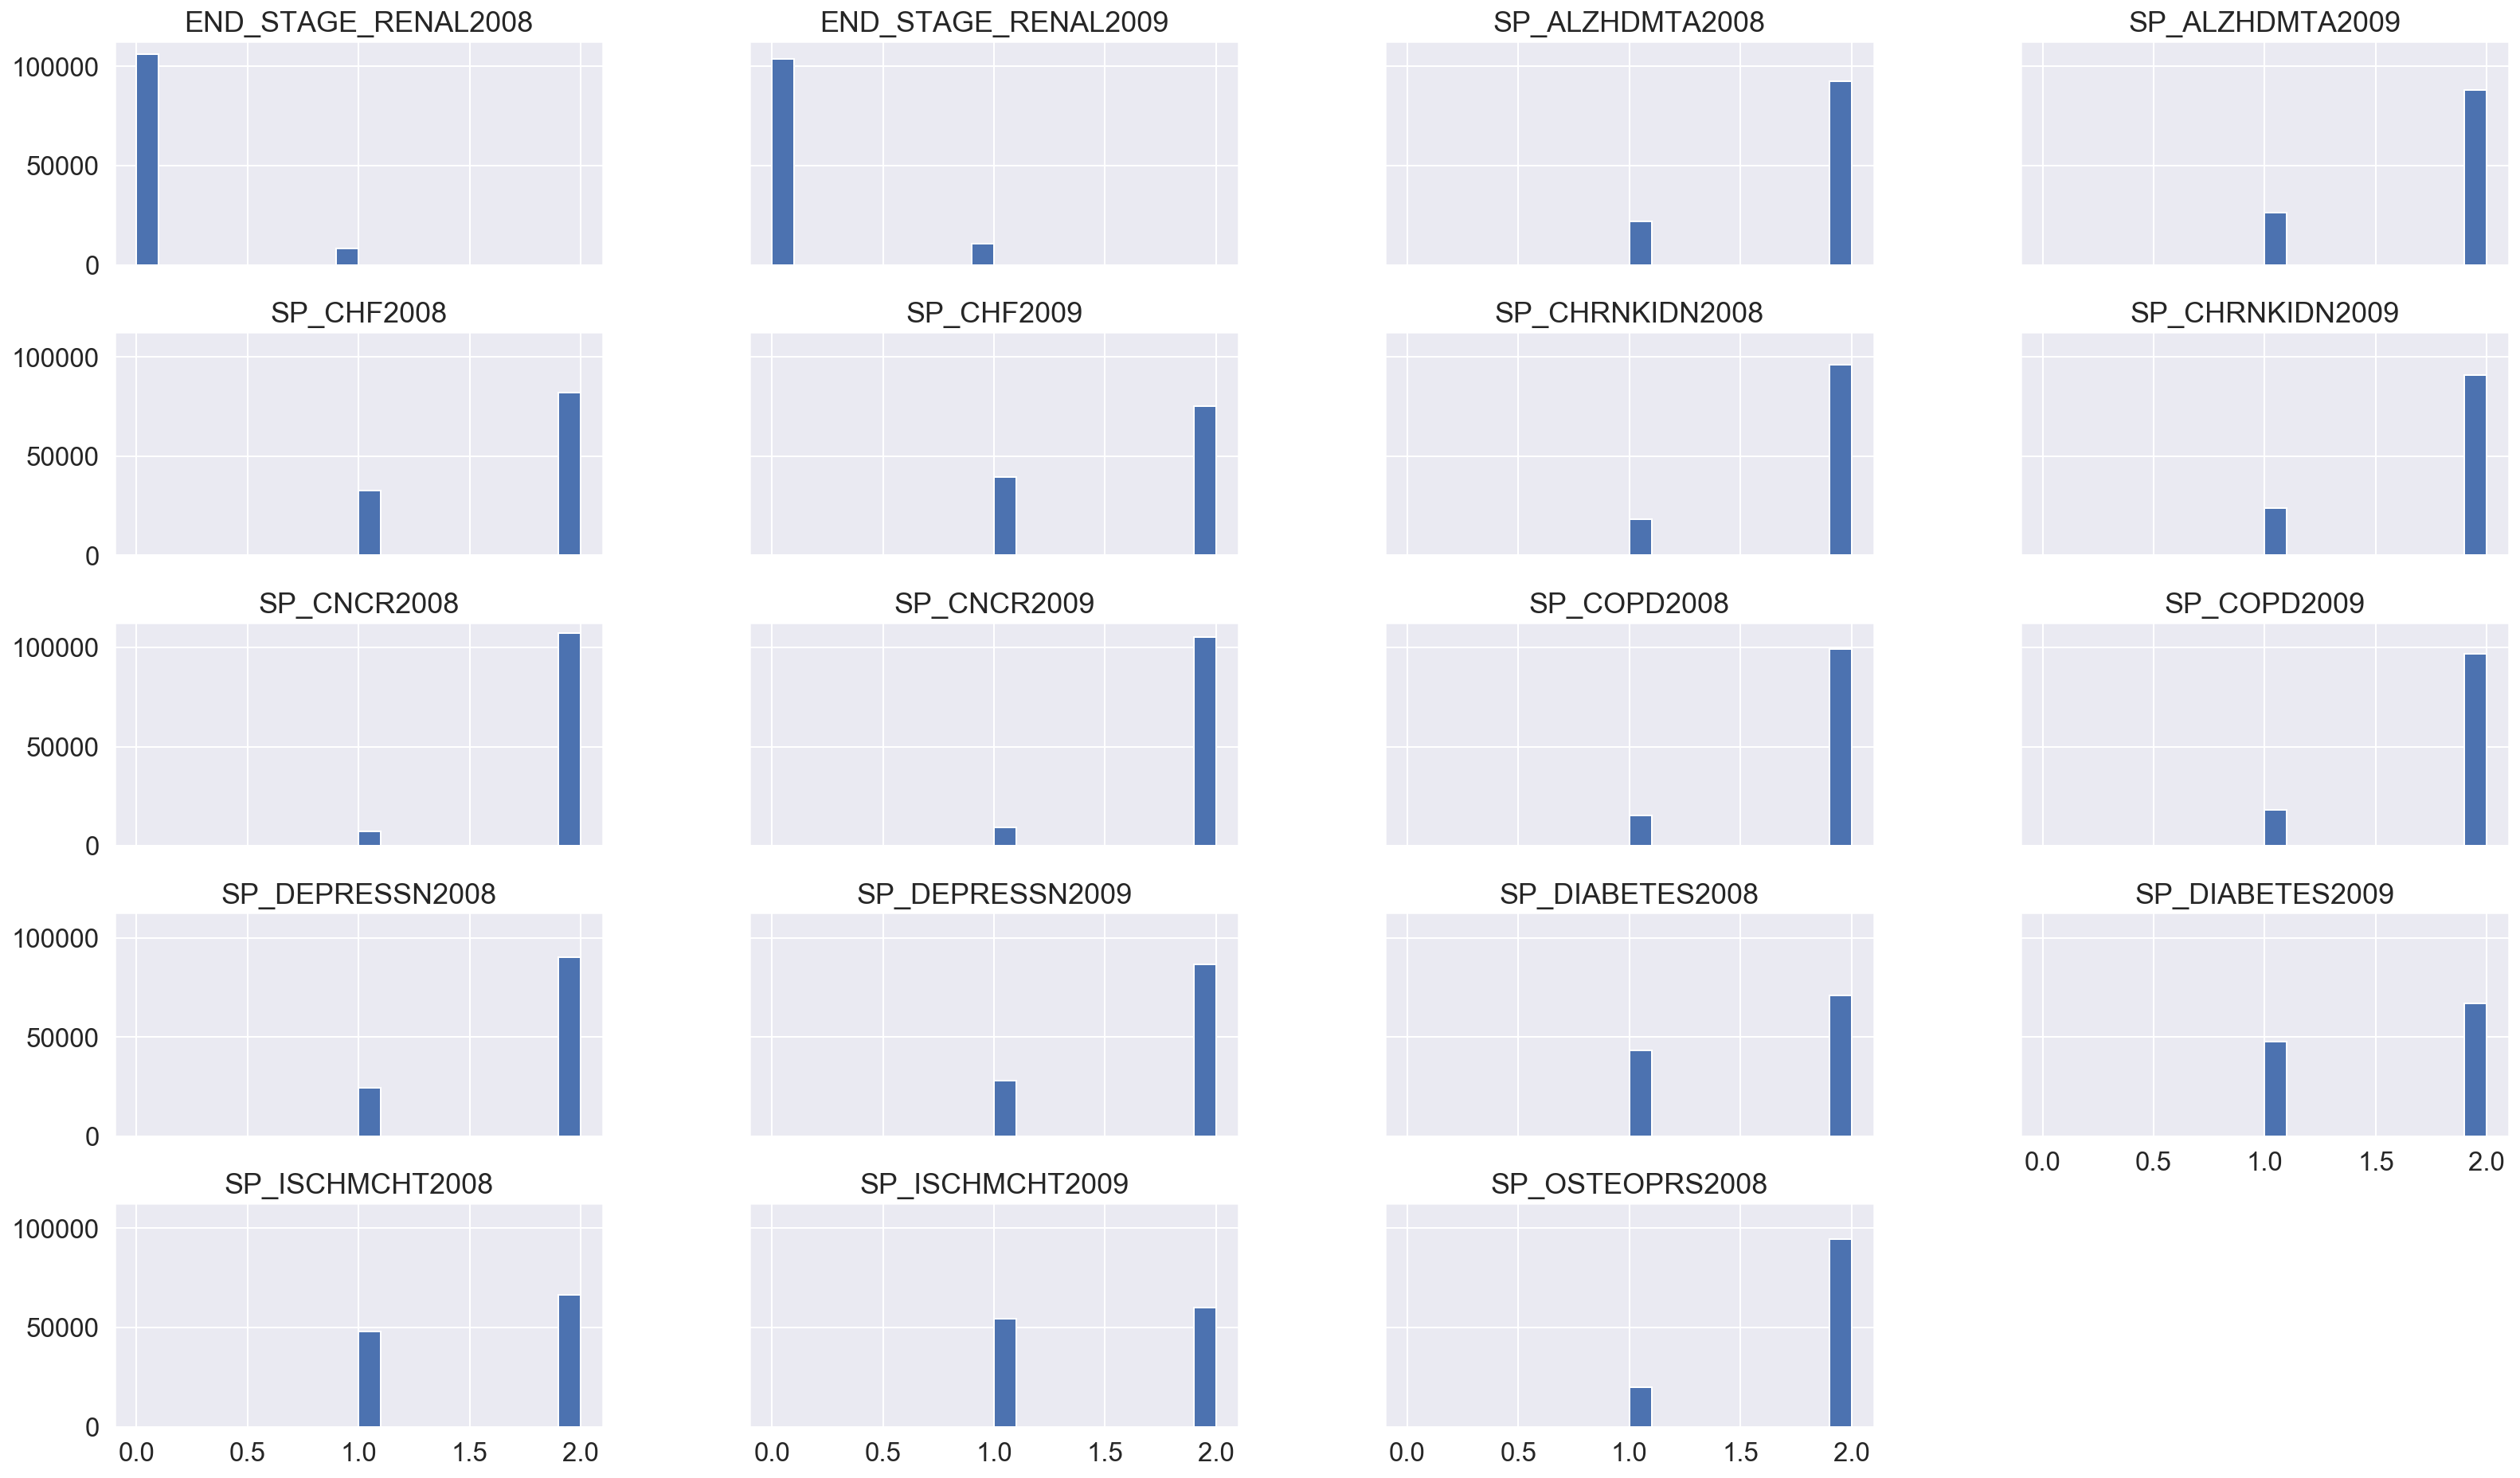

In [34]:
# Plot value_counts ??

df.iloc[:,5:24].hist(figsize=(24,16), sharex=True, sharey=True)
plt.show()  # 1 means have diesease, 2 means no disease

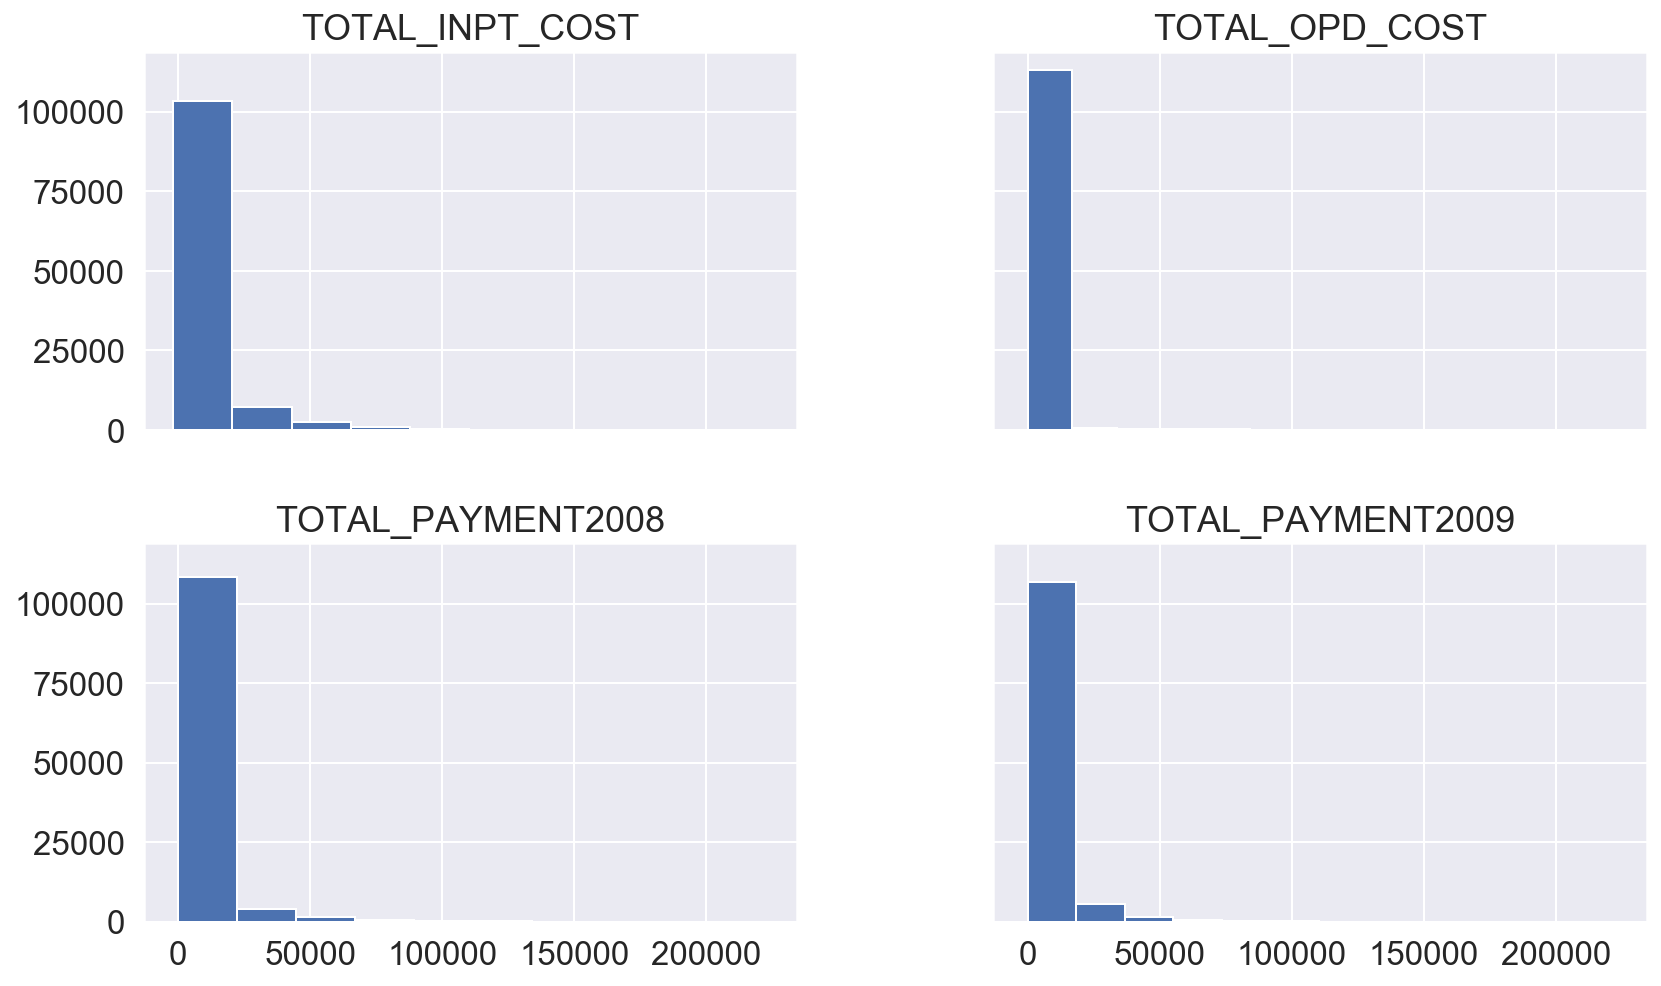

In [35]:
df[['TOTAL_INPT_COST', 'TOTAL_OPD_COST',
                                    'TOTAL_PAYMENT2008',
                                    'TOTAL_PAYMENT2009']].hist(figsize=(12,8), sharex=True, sharey=True)
plt.show()  

In [30]:
#final2008_2009DF_selectedFeatures.iloc[:,20:29].hist(figsize=(12,20), sharex=True, sharey=True)
#plt.show()

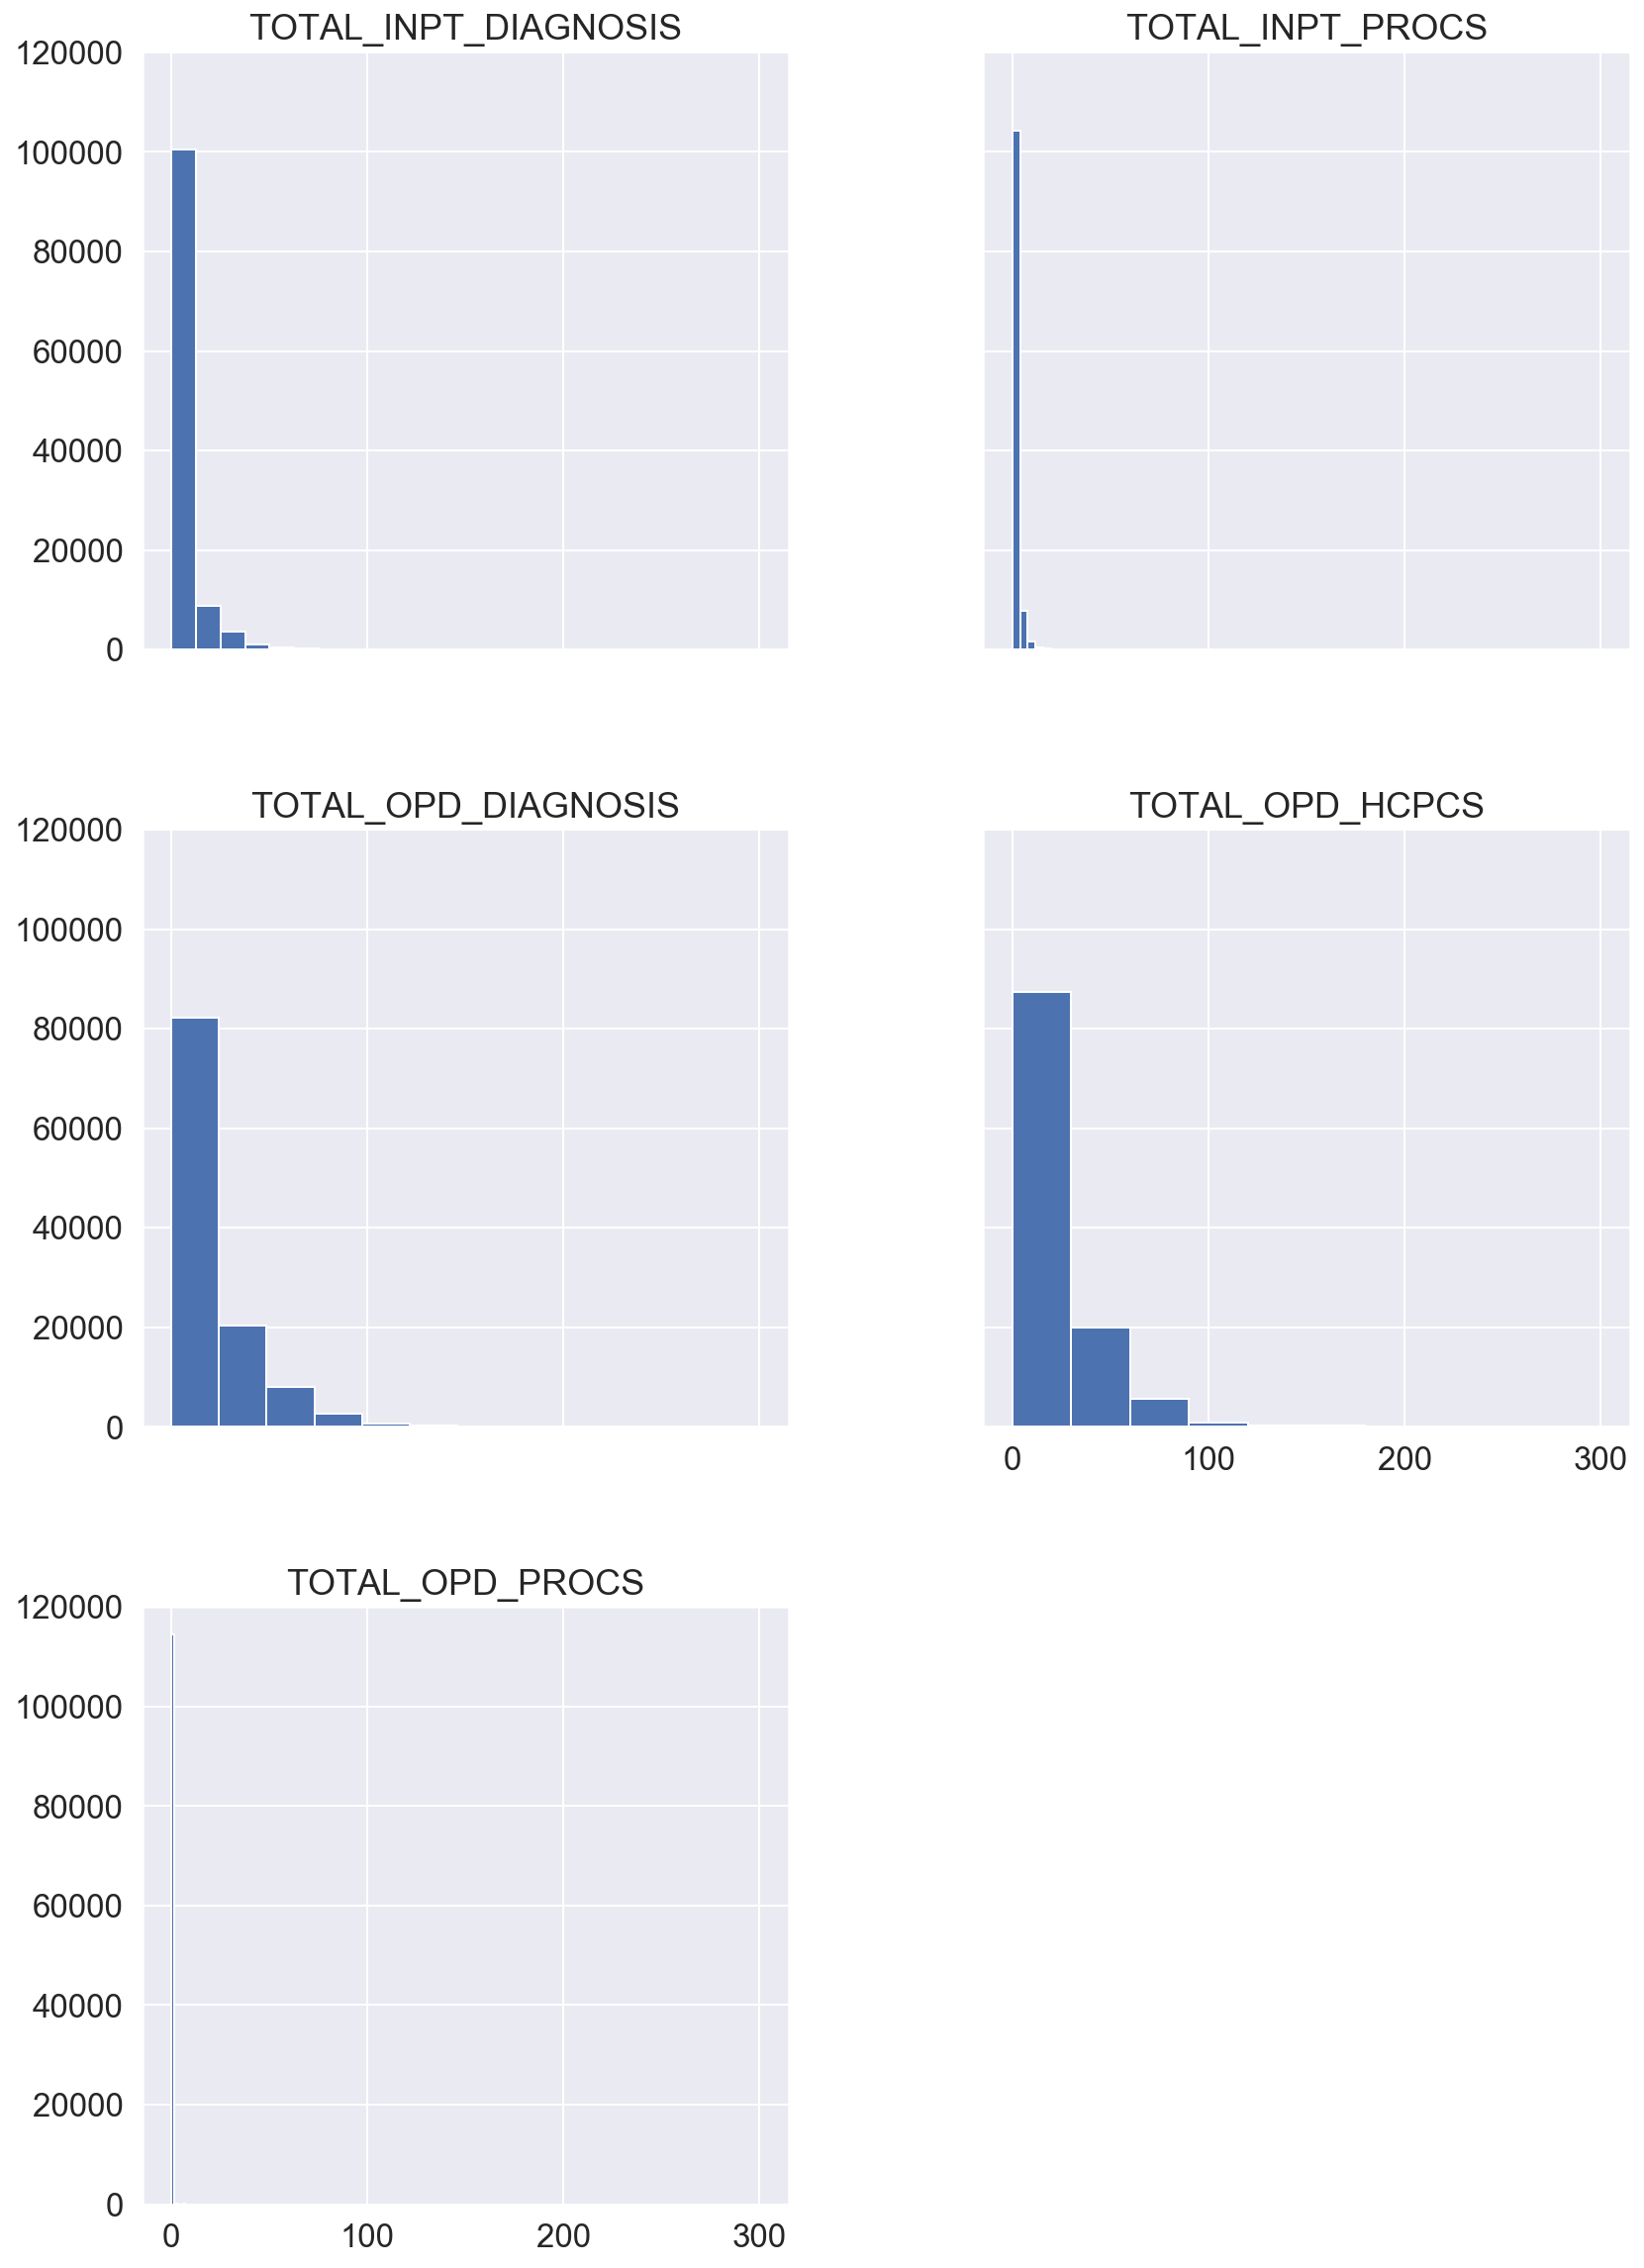

In [36]:
df[['TOTAL_INPT_DIAGNOSIS','TOTAL_INPT_PROCS', 
                                   'TOTAL_OPD_DIAGNOSIS','TOTAL_OPD_PROCS',
                                   'TOTAL_OPD_HCPCS',]].hist(figsize=(12,20), sharex=True, sharey=True) #bins=10
plt.show()  #  'NUM_OPD_VISIT'

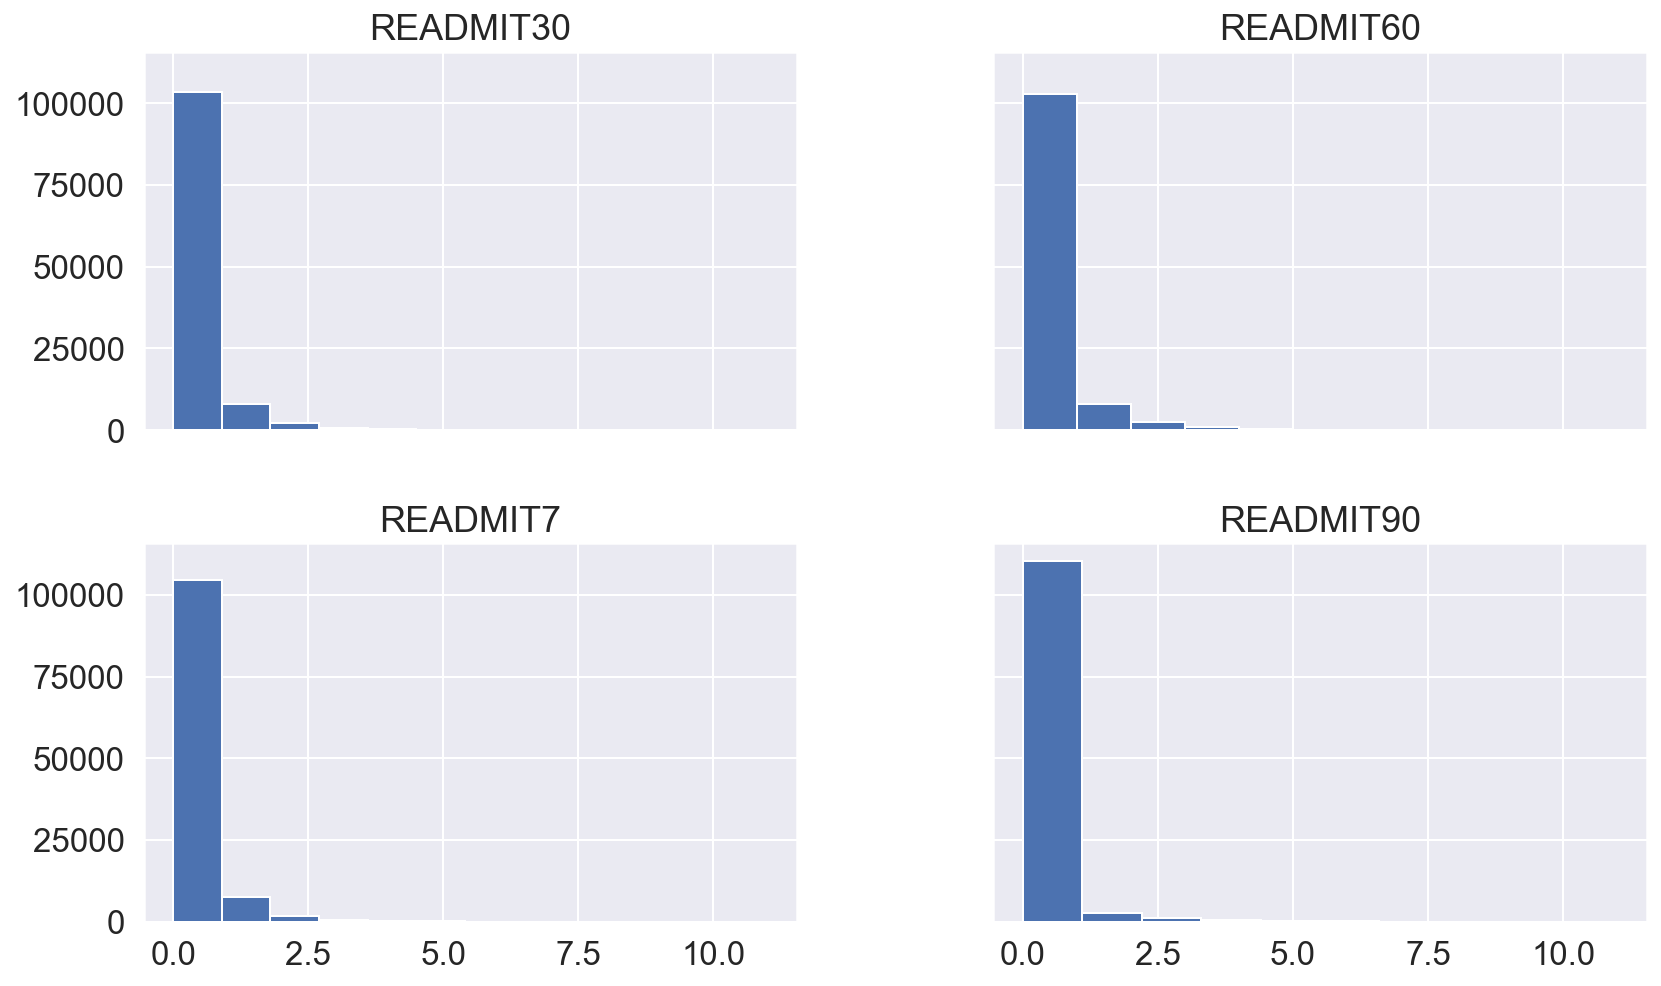

In [37]:
df[['READMIT7','READMIT30','READMIT60','READMIT90']].hist(figsize=(12,8), sharex=True, sharey=True)
plt.show()

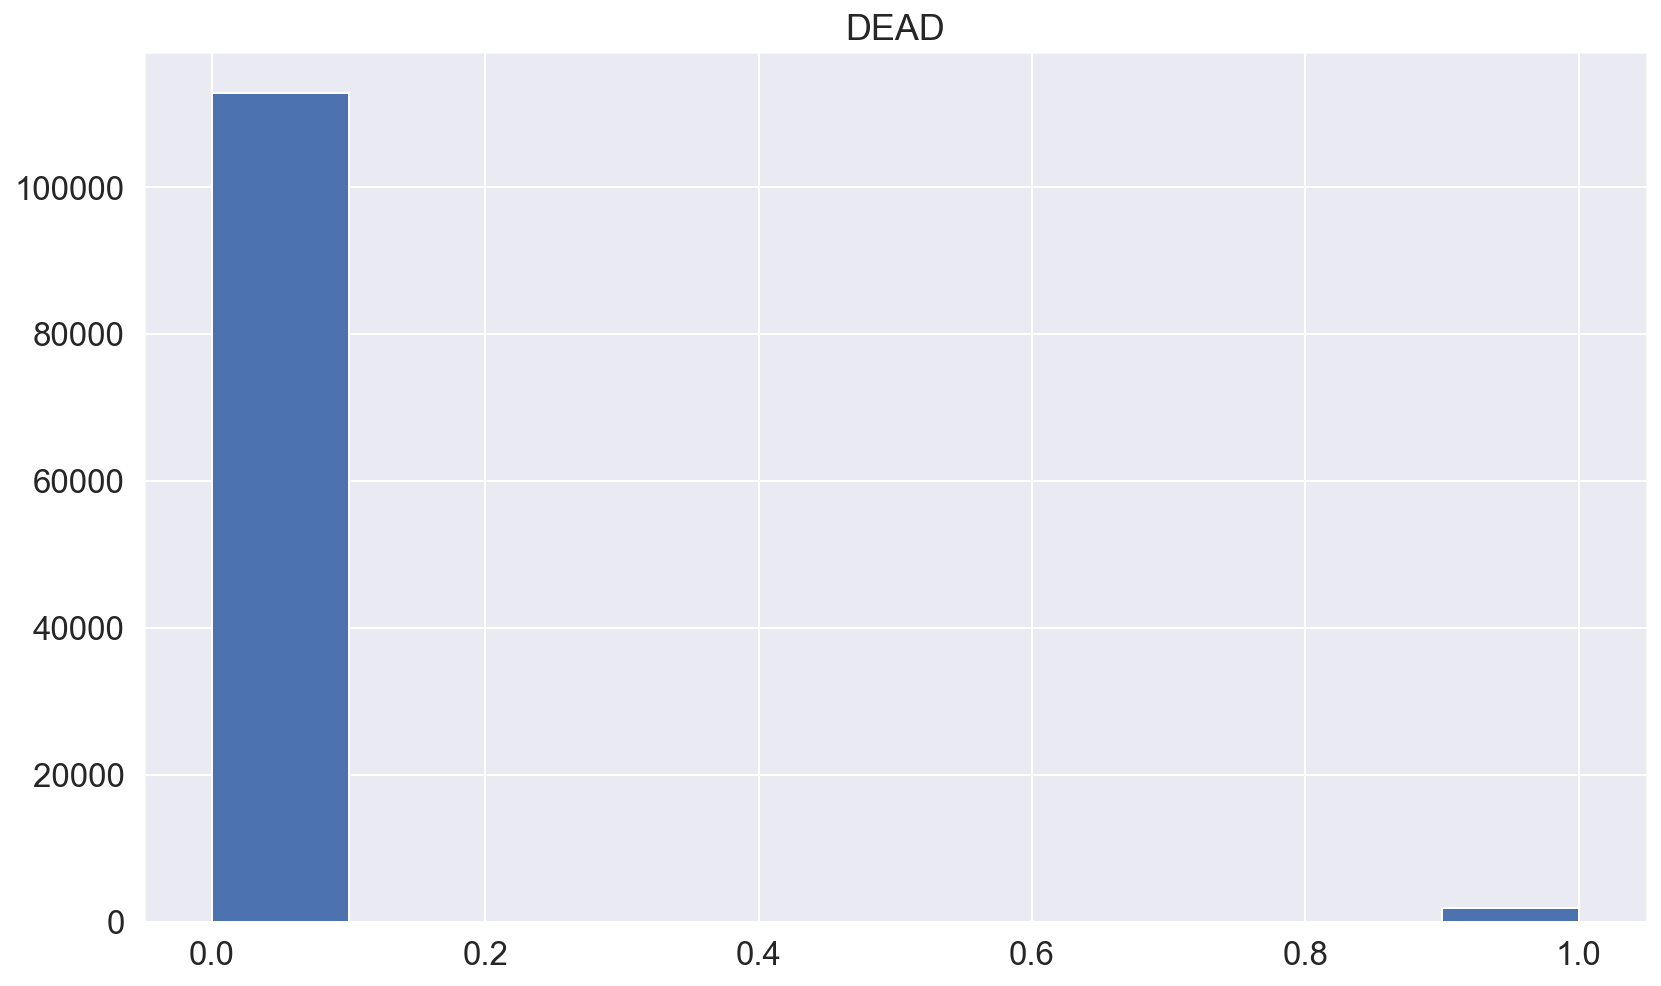

In [38]:
df[['DEAD']].hist(figsize=(12,8), sharex=True, sharey=True)
plt.show()

### Looking for corelation between the variables

In [29]:
corr = df.corr()
corr

BENE_SEX_IDENT_CD  BENE_RACE_CD  END_STAGE_RENAL2008  \
BENE_SEX_IDENT_CD              1.000000     -0.004291             0.011222   
BENE_RACE_CD                  -0.004291      1.000000            -0.009430   
END_STAGE_RENAL2008            0.011222     -0.009430             1.000000   
END_STAGE_RENAL2009            0.015480     -0.020283             0.227481   
SP_ALZHDMTA2008               -0.023638      0.022411            -0.181896   
SP_ALZHDMTA2009               -0.027125      0.024489            -0.156833   
SP_CHF2008                    -0.027079      0.032289            -0.247842   
SP_CHF2009                    -0.025917      0.038810            -0.213314   
SP_CHRNKIDN2008               -0.018702      0.024056            -0.446973   
SP_CHRNKIDN2009               -0.019286      0.023541            -0.260468   
SP_CNCR2008                   -0.001767      0.023399            -0.097303   
SP_CNCR2009                    0.003156      0.026969            -0.077658   
SP_COPD2008                   -0.019281      0.017021            -0.213833   
SP_COPD2009                   -0.021545      0.022844            -0.181060   
SP_DEPRESSN2008               -0.035134      0.015247            -0.168874   
SP_DEPRESSN2009               -0.031916      0.018455            -0.150428   
SP_DIABETES2008               -0.040672      0.032566            -0.240542   
SP_DIABETES2009               -0.039577      0.039351            -0.214815   
SP_ISCHMCHT2008               -0.031644      0.045997            -0.223058   
SP_ISCHMCHT2009               -0.028884      0.046051            -0.192472   
SP_OSTEOPRS2008               -0.032193      0.029683            -0.112272   
SP_OSTEOPRS2009               -0.028576      0.030561            -0.089315   
SP_RA_OA2008                  -0.024934      0.028441            -0.139723   
SP_RA_OA2009                  -0.024867      0.025490            -0.117160   
SP_STRKETIA2008               -0.003246      0.009405            -0.150847   
TOTAL_DIAGNOSIS2008            0.043746     -0.045765             0.353412   
TOTAL_DIAGNOSIS2009            0.042997     -0.051381             0.290571   
TOTAL_PAYMENT2008              0.010545     -0.021940             0.344657   
TOTAL_PAYMENT2009              0.021001     -0.031196             0.257212   
CHANGE_IN_PAYMEMT              0.007230     -0.004770            -0.116466   
CHANGE_IN_DIAGNOSIS            0.000742     -0.010188            -0.077536   
DEAD                          -0.001506     -0.001196             0.004481   
AGE                            0.110232     -0.076204             0.027264   
LOS                            0.006102     -0.001748            -0.006244   
NUM_INPT_ADM                   0.004015     -0.001731            -0.003883   
TOTAL_INPT_COST                0.002334     -0.000729            -0.004291   
TOTAL_INPT_DIAGNOSIS           0.004823     -0.000859            -0.003105   
TOTAL_INPT_PROCS               0.005593     -0.001265            -0.002819   
READMIT7                       0.007479     -0.000049            -0.002796   
READMIT30                      0.006849      0.000810            -0.003125   
READMIT60                      0.005741      0.001118            -0.004132   
READMIT90                      0.004743     -0.000210            -0.004375   
NUM_OPD_VISIT                 -0.000508     -0.000218            -0.003218   
TOTAL_OPD_COST                -0.004226      0.001878            -0.003061   
TOTAL_OPD_DIAGNOSIS           -0.001073     -0.000493            -0.002878   
TOTAL_OPD_PROCS                0.001015      0.000912            -0.001808   
TOTAL_OPD_HCPCS               -0.001399     -0.000865            -0.002946   
TOTAL_QTY_DSPNSD_NUM          -0.002489      0.001929            -0.002534   
PTNT_PAY_RX_AMT               -0.001585      0.002879            -0.003978   
TOT_RX_CST_AMT                -0.001683      0.002804            -0.002730   
READMIT7_FLAG                  0.001197     

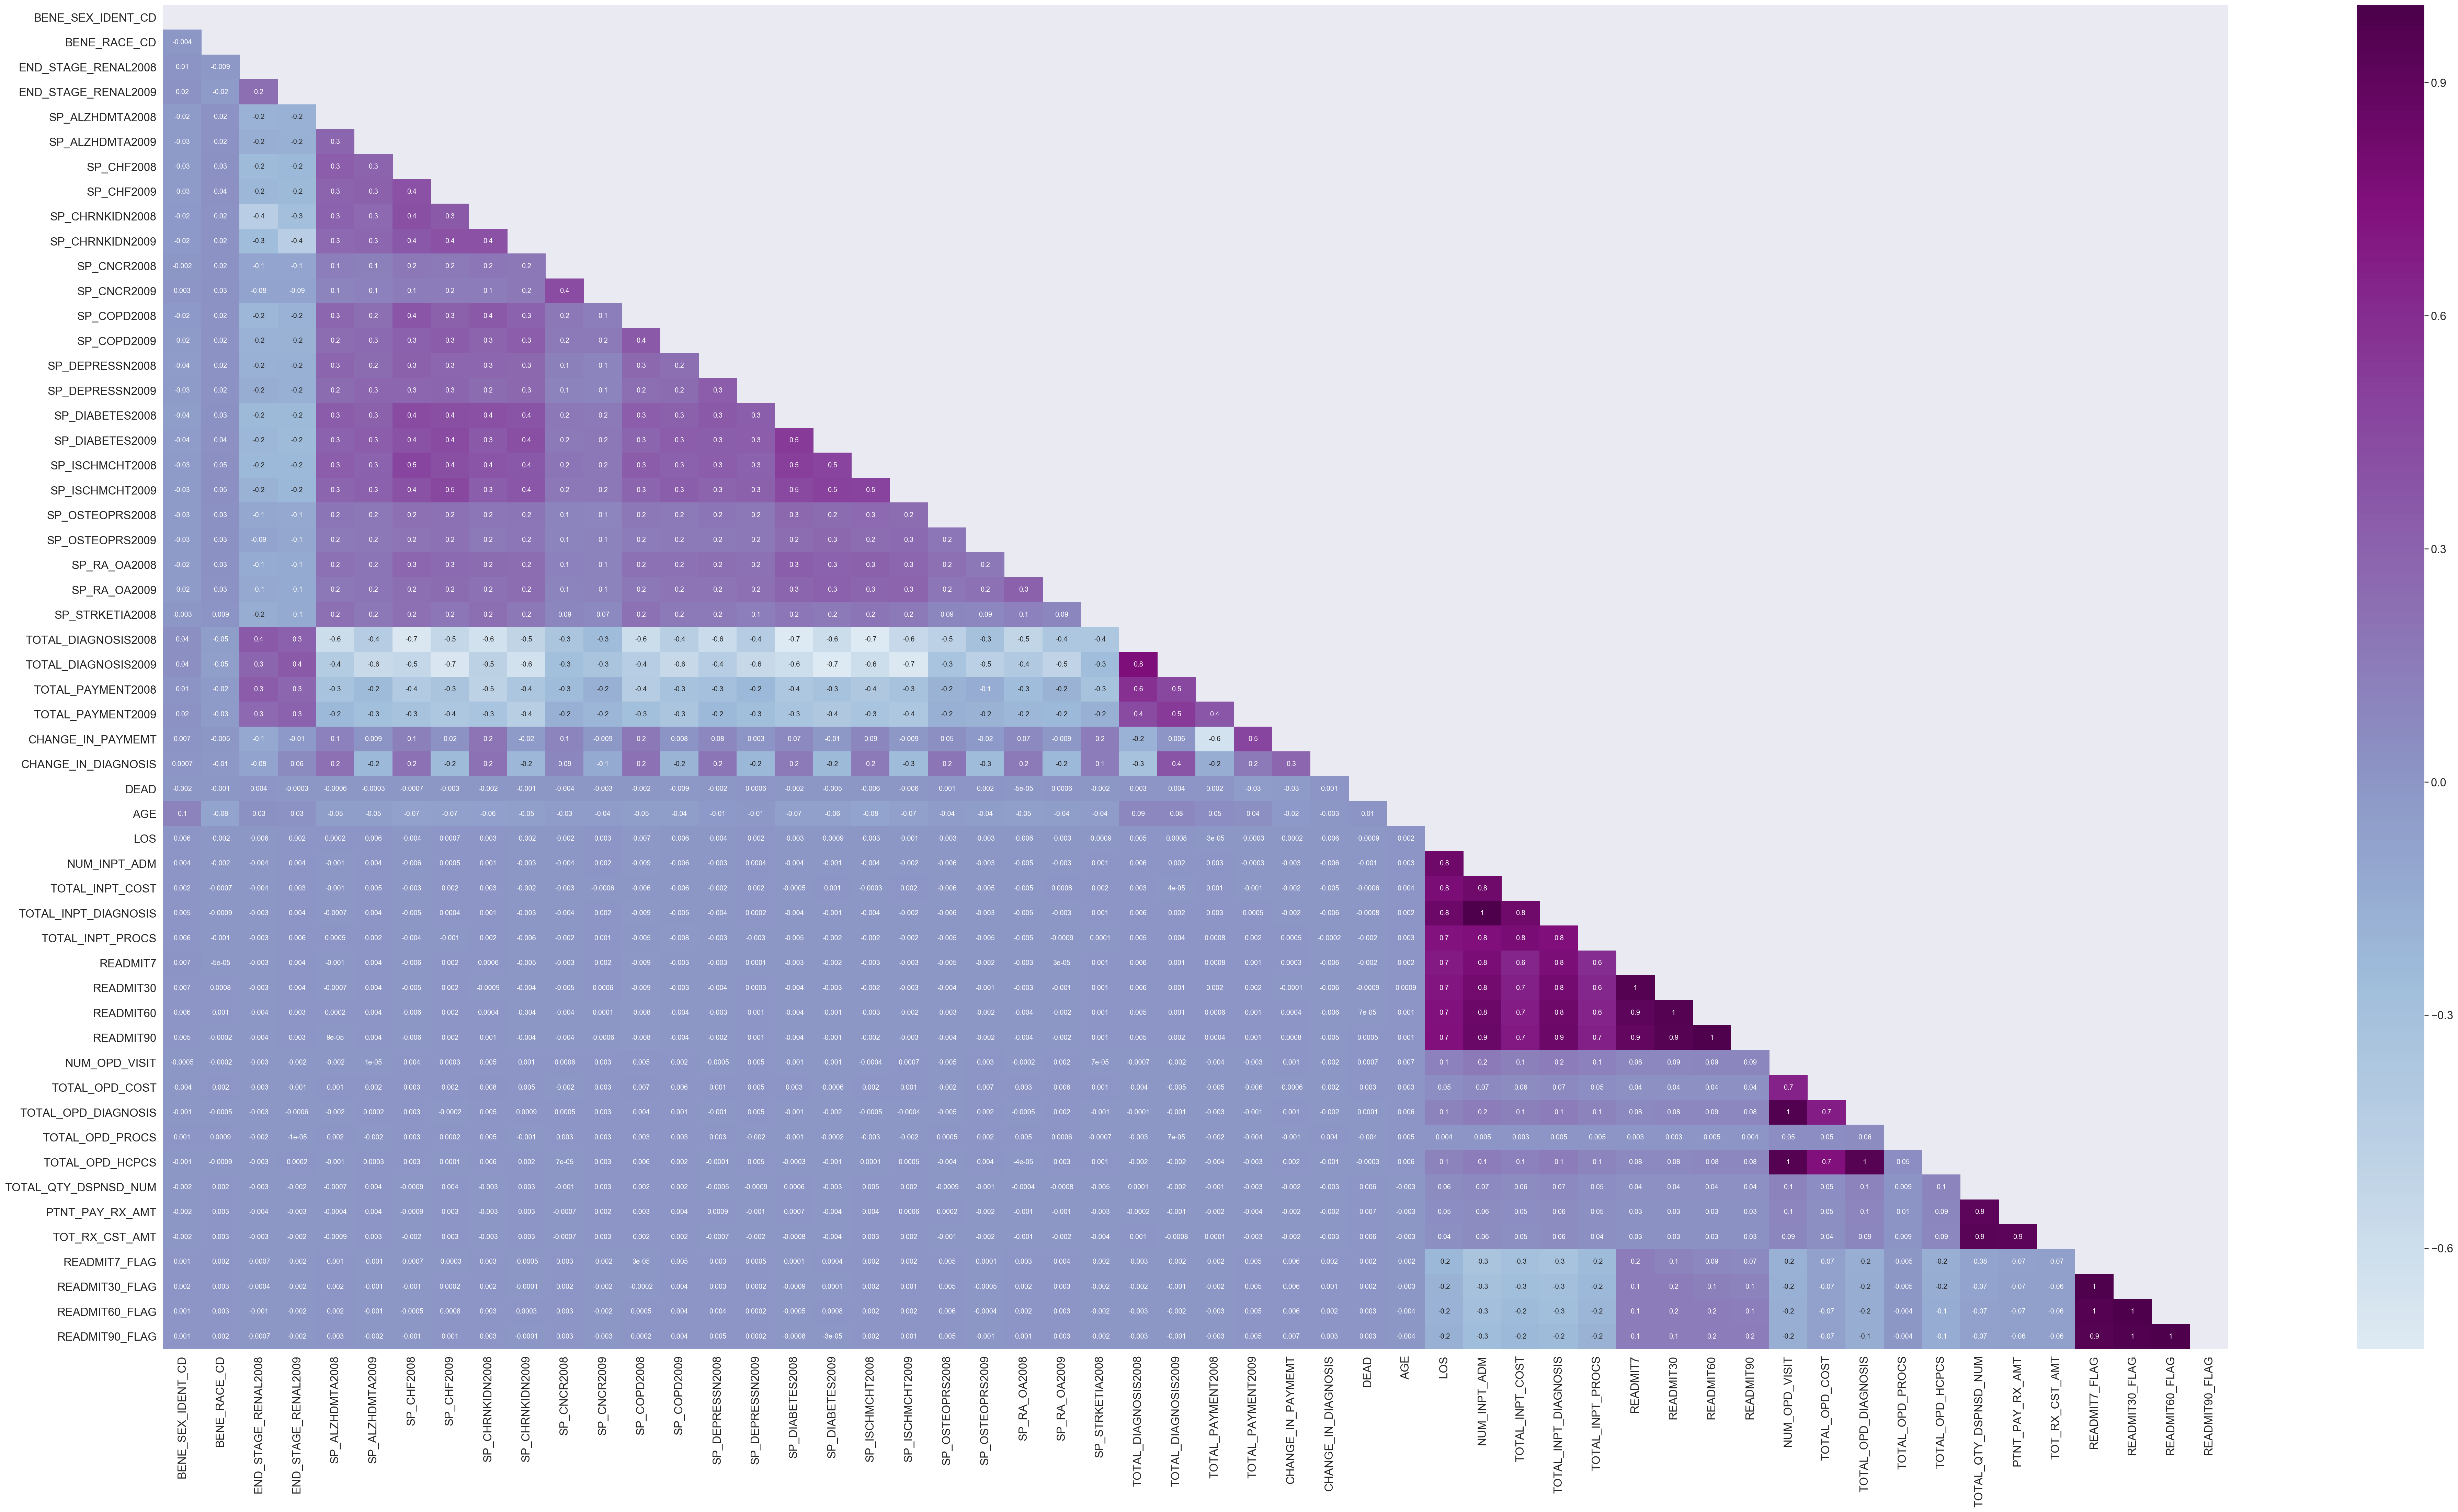

In [32]:
fig, ax = plt.subplots(figsize=(60,36))
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot = True, mask=matrix, center= 0, cmap="BuPu" ,fmt='.1g'); #cmap= 'coolwarm',    

#### Correlation of predcitor variable against the target variables

In [43]:
corr1 = df.corr()['READMIT30_FLAG'][:] # 'READMIT7', 'READMIT30', 'READMIT60', 'READMIT90'
corr1.sort_values(ascending=False)

READMIT30_FLAG          1.000000
READMIT60_FLAG          0.981608
READMIT7_FLAG           0.975942
READMIT90_FLAG          0.967479
READMIT30               0.154017
READMIT7                0.147851
READMIT60               0.127266
READMIT90               0.108344
CHANGE_IN_PAYMEMT       0.005762
SP_OSTEOPRS2008         0.005427
TOTAL_PAYMENT2009       0.004986
SP_COPD2009             0.003564
BENE_RACE_CD            0.003454
SP_RA_OA2009            0.003260
SP_DEPRESSN2008         0.002641
SP_RA_OA2008            0.002425
SP_CNCR2008             0.002354
DEAD                    0.002264
BENE_SEX_IDENT_CD       0.001941
SP_CHRNKIDN2008         0.001801
SP_ISCHMCHT2008         0.001644
SP_ALZHDMTA2008         0.001521
SP_ISCHMCHT2009         0.001448
CHANGE_IN_DIAGNOSIS     0.001303
SP_DEPRESSN2009         0.000225
SP_CHF2009              0.000196
SP_DIABETES2009         0.000106
SP_CHRNKIDN2009        -0.000128
SP_COPD2008            -0.000190
END_STAGE_RENAL2008    -0.000409
SP_OSTEOPR

### Feature selection (excuding string summation of ICDs and features which are showing colinearity etc.)

In [11]:
df_selected = df[['BENE_SEX_IDENT_CD',
       'BENE_RACE_CD', 'END_STAGE_RENAL2008', 'END_STAGE_RENAL2009',
       'SP_ALZHDMTA2008', 'SP_ALZHDMTA2009', 'SP_CHF2008', 'SP_CHF2009',
       'SP_CHRNKIDN2008', 'SP_CHRNKIDN2009', 'SP_CNCR2008', 'SP_CNCR2009',
       'SP_COPD2008', 'SP_COPD2009', 'SP_DEPRESSN2008', 'SP_DEPRESSN2009',
       'SP_DIABETES2008', 'SP_DIABETES2009', 'SP_ISCHMCHT2008',
       'SP_ISCHMCHT2009', 'SP_OSTEOPRS2008', 'SP_OSTEOPRS2009', 'SP_RA_OA2008',
       'SP_RA_OA2009', 'SP_STRKETIA2008', 'TOTAL_DIAGNOSIS2008',
       'TOTAL_DIAGNOSIS2009', 'TOTAL_PAYMENT2008', 'TOTAL_PAYMENT2009',
       'CHANGE_IN_PAYMEMT', 'CHANGE_IN_DIAGNOSIS', 'AGE', 'LOS',
       'NUM_INPT_ADM', 'TOTAL_INPT_COST', 'TOTAL_INPT_DIAGNOSIS',
       'TOTAL_INPT_PROCS', 
       'NUM_OPD_VISIT', 'TOTAL_OPD_COST', 'TOTAL_OPD_DIAGNOSIS',
       'TOTAL_OPD_PROCS', 'TOTAL_OPD_HCPCS', 'TOTAL_QTY_DSPNSD_NUM',
       'PTNT_PAY_RX_AMT', 'TOT_RX_CST_AMT', 'READMIT30_FLAG']].copy()   # , 'DEAD'
print(df_selected.shape)
df_selected.head(2)  
# 'READMIT7', 'READMIT30', 'READMIT60', 'READMIT90',

(114538, 46)


BENE_SEX_IDENT_CD  BENE_RACE_CD  END_STAGE_RENAL2008  END_STAGE_RENAL2009  \
0                  1             1                    0                    0   
1                  1             1                    0                    0   

   SP_ALZHDMTA2008  SP_ALZHDMTA2009  SP_CHF2008  SP_CHF2009  SP_CHRNKIDN2008  \
0                2                2           2           2                2   
1                2                1           2           2                2   

   SP_CHRNKIDN2009  SP_CNCR2008  SP_CNCR2009  SP_COPD2008  SP_COPD2009  \
0                2            2            2            2            2   
1                1            2            2            2            2   

   SP_DEPRESSN2008  SP_DEPRESSN2009  SP_DIABETES2008  SP_DIABETES2009  \
0                2                2                2                2   
1                2                1                2                1   

   SP_ISCHMCHT2008  SP_ISCHMCHT2009  SP_OSTEOPRS2008  SP_OSTEOPRS2009  \
0                2                2                2                2   
1                2                1                2                2   

   SP_RA_OA2008  SP_RA_OA2009  SP_STRKETIA2008  TOTAL_DIAGNOSIS2008  \
0             2             2                2                    0   
1             2             1                2                    0   

   TOTAL_DIAGNOSIS2009  TOTAL_PAYMENT2008  TOTAL_PAYMENT2009  \
0                    0               60.0              120.0   
1                    7              940.0            41314.0   

   CHANGE_IN_PAYMEMT  CHANGE_IN_DIAGNOSIS   AGE               LOS  \
0               60.0                    0  86.0    86400000000000   
1            40374.0                    7  66.0  1382400000000000   

   NUM_INPT_ADM  TOTAL_INPT_COST  TOTAL_INPT_DIAGNOSIS  TOTAL_INPT_PROCS  \
0           1.0           5100.0                   9.0               0.0   
1           4.0          56304.0                  27.0               4.0   

   NUM_OPD_VISIT  TOTAL_OPD_COST  TOTAL_OPD_DIAGNOSIS  TOTAL_OPD_PROCS  \
0            1.0            60.0                  1.0              0.0   
1            2.0           130.0                  9.0              0.0   

   TOTAL_OPD_HCPCS  TOTAL_QTY_DSPNSD_NUM  PTNT_PAY_RX_AMT  TOT_RX_CST_AMT  \
0              2.0               10420.0           2270.0         14360.0   
1              9.0                 900.0             60.0          2080.0   

   READMIT30_FLAG  
0               0  
1               1

In [51]:
df_selected.dtypes

BENE_SEX_IDENT_CD         int64
BENE_RACE_CD              int64
END_STAGE_RENAL2008       int64
END_STAGE_RENAL2009       int64
SP_ALZHDMTA2008           int64
SP_ALZHDMTA2009           int64
SP_CHF2008                int64
SP_CHF2009                int64
SP_CHRNKIDN2008           int64
SP_CHRNKIDN2009           int64
SP_CNCR2008               int64
SP_CNCR2009               int64
SP_COPD2008               int64
SP_COPD2009               int64
SP_DEPRESSN2008           int64
SP_DEPRESSN2009           int64
SP_DIABETES2008           int64
SP_DIABETES2009           int64
SP_ISCHMCHT2008           int64
SP_ISCHMCHT2009           int64
SP_OSTEOPRS2008           int64
SP_OSTEOPRS2009           int64
SP_RA_OA2008              int64
SP_RA_OA2009              int64
SP_STRKETIA2008           int64
TOTAL_DIAGNOSIS2008       int64
TOTAL_DIAGNOSIS2009       int64
TOTAL_PAYMENT2008       float64
TOTAL_PAYMENT2009       float64
CHANGE_IN_PAYMEMT       float64
CHANGE_IN_DIAGNOSIS       int64
AGE     

In [ ]:
# Check if and who got readmiited 8 times

### Selecting Predictor and Target Variables

In [12]:
y = df_selected.pop('READMIT30_FLAG')  #df_selected.pop('DEAD') 
X = df_selected  

print(X.shape)
print(y.shape)

(114538, 45)
(114538,)


### Checking for baseline accuracy

In [13]:
y.value_counts(normalize=True)

1    0.767623
0    0.232377
Name: READMIT30_FLAG, dtype: float64

#### Since the dataset doesn't seem to be too imbalance, over or under sampling isn't required

### Train - Test split

In [14]:
# Creating Train, test split with Target variable for fixed features 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True) #, stratify=y ) #, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(91630, 45)
(91630,)
(22908, 45)
(22908,)


#### Standardize the data

In [15]:
# Standardize the data
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### Principal Component Analysis to select important features and remove any colinear features

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=28)

# PCA fit-tranform on train data
X_train_pca = pca.fit_transform(X_train)

# Converting into DataFrame
PCA_col_dict = {'PCA'+str(i+1): pca.components_[i]
            for i in range(len(pca.components_))}
X_train_pca = pd.DataFrame(X_train_pca, columns=PCA_col_dict) 
print(X_train_pca.shape)

# PCA tranform on test data
X_test_pca = pca.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca, columns=PCA_col_dict) 

print(X_test_pca.shape)

X_train_pca.head(2)

(91630, 28)
(22908, 28)


PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0 -3.021479 -1.275822 -0.132236  1.128379  0.459425  0.432443  0.198479   
1  4.799011 -1.848642 -1.032186  0.878065 -3.316891 -1.305014  0.632018   

       PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
0  0.131482  0.676176 -0.678280  0.073171  0.658298  0.034900  0.203786   
1 -0.801494  1.207259  3.570258 -0.408355 -2.522893  2.724358 -0.245432   

      PCA15     PCA16     PCA17     PCA18     PCA19     PCA20     PCA21  \
0 -0.102903 -0.034869 -0.082738 -0.222431 -0.023544 -0.077078 -0.000625   
1  0.173653 -0.164392  0.206130 -0.657101 -0.494281 -1.807269  1.190527   

      PCA22     PCA23     PCA24     PCA25     PCA26     PCA27     PCA28  
0  0.035501  0.003862 -0.053683  0.048076 -0.020894 -0.039902 -0.148834  
1 -2.286690  1.154843 -0.009112  0.835292  1.160186  0.405660 -0.440892

In [18]:
explained_variance = pca.explained_variance_ratio_
explained_variance.cumsum()

array([0.20068146, 0.30234083, 0.37535297, 0.435956  , 0.4912286 ,
       0.52202224, 0.55071474, 0.57896237, 0.60397199, 0.6263226 ,
       0.64843739, 0.67041666, 0.69033195, 0.70989121, 0.72885754,
       0.74740327, 0.7658417 , 0.78379614, 0.80096959, 0.81750212,
       0.83265729, 0.84729935, 0.86157829, 0.87538793, 0.88843219,
       0.90140072, 0.91387526, 0.92597623])

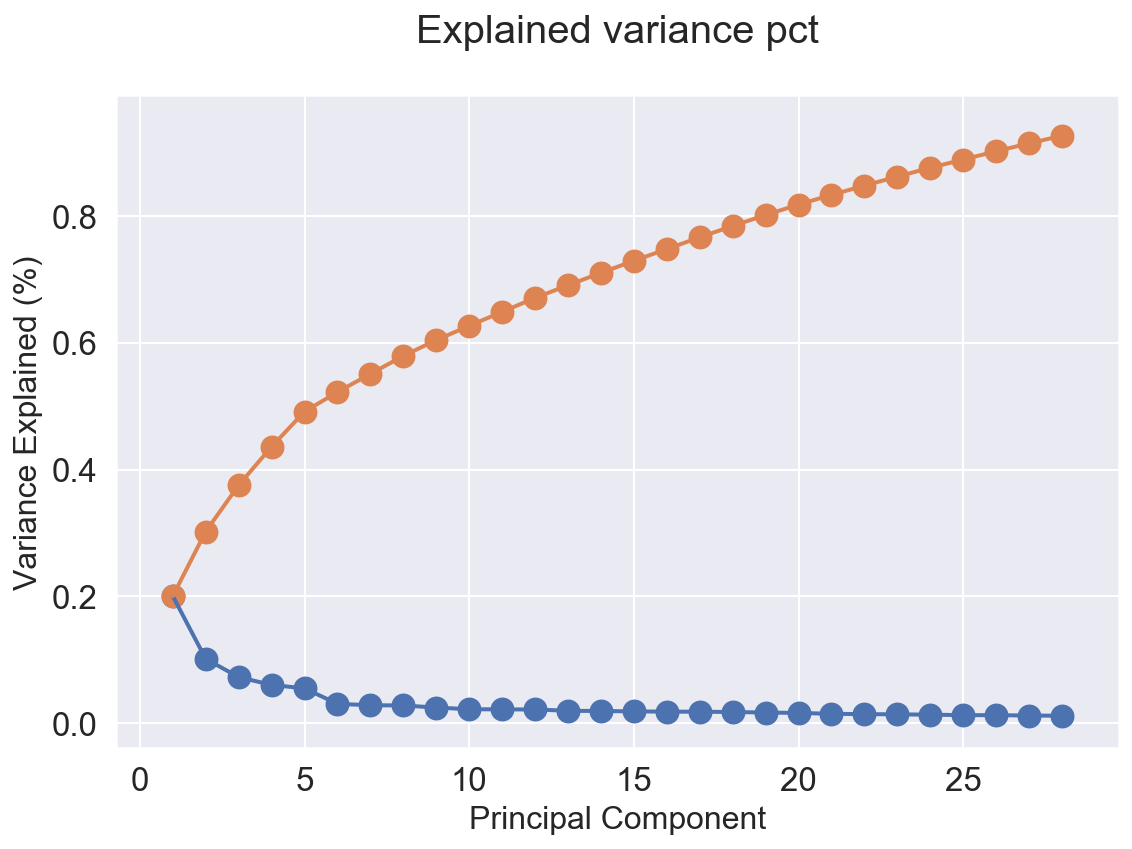

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
x_values = list(range(1, pca.n_components_+1))
ax.plot(x_values, explained_variance, lw=2)
ax.scatter(x_values, explained_variance, s=120)
ax.plot(x_values, np.cumsum(explained_variance), lw=2)
ax.scatter(x_values, np.cumsum(explained_variance), s=120)
#ax.plot(x_values,0.9)
ax.set_title('Explained variance pct\n', fontsize=20)
ax.set_xlabel('Principal Component', fontsize=16)
ax.set_ylabel('Variance Explained (%)', fontsize=16)
plt.show()

#### We select 32 PCA's which return 95% of variance  (28 PCA return 90% variance)

In [96]:
'''
Xpca_corr = X_pca.corr() #correlations.loc[[col for col in X_combined.columns if 'PCA' in col], disciplines]

fig, ax = plt.subplots(figsize=(60,36))
matrix = np.triu(Xpca_corr)
ax = sns.heatmap(Xpca_corr, annot = True, mask=matrix, center= 0, cmap="BuPu" ,fmt='.1g'); #cmap= 'coolwarm',  
'''

'\nXpca_corr = X_pca.corr() #correlations.loc[[col for col in X_combined.columns if \'PCA\' in col], disciplines]\n\nfig, ax = plt.subplots(figsize=(60,36))\nmatrix = np.triu(Xpca_corr)\nax = sns.heatmap(Xpca_corr, annot = True, mask=matrix, center= 0, cmap="BuPu" ,fmt=\'.1g\'); #cmap= \'coolwarm\',  \n'

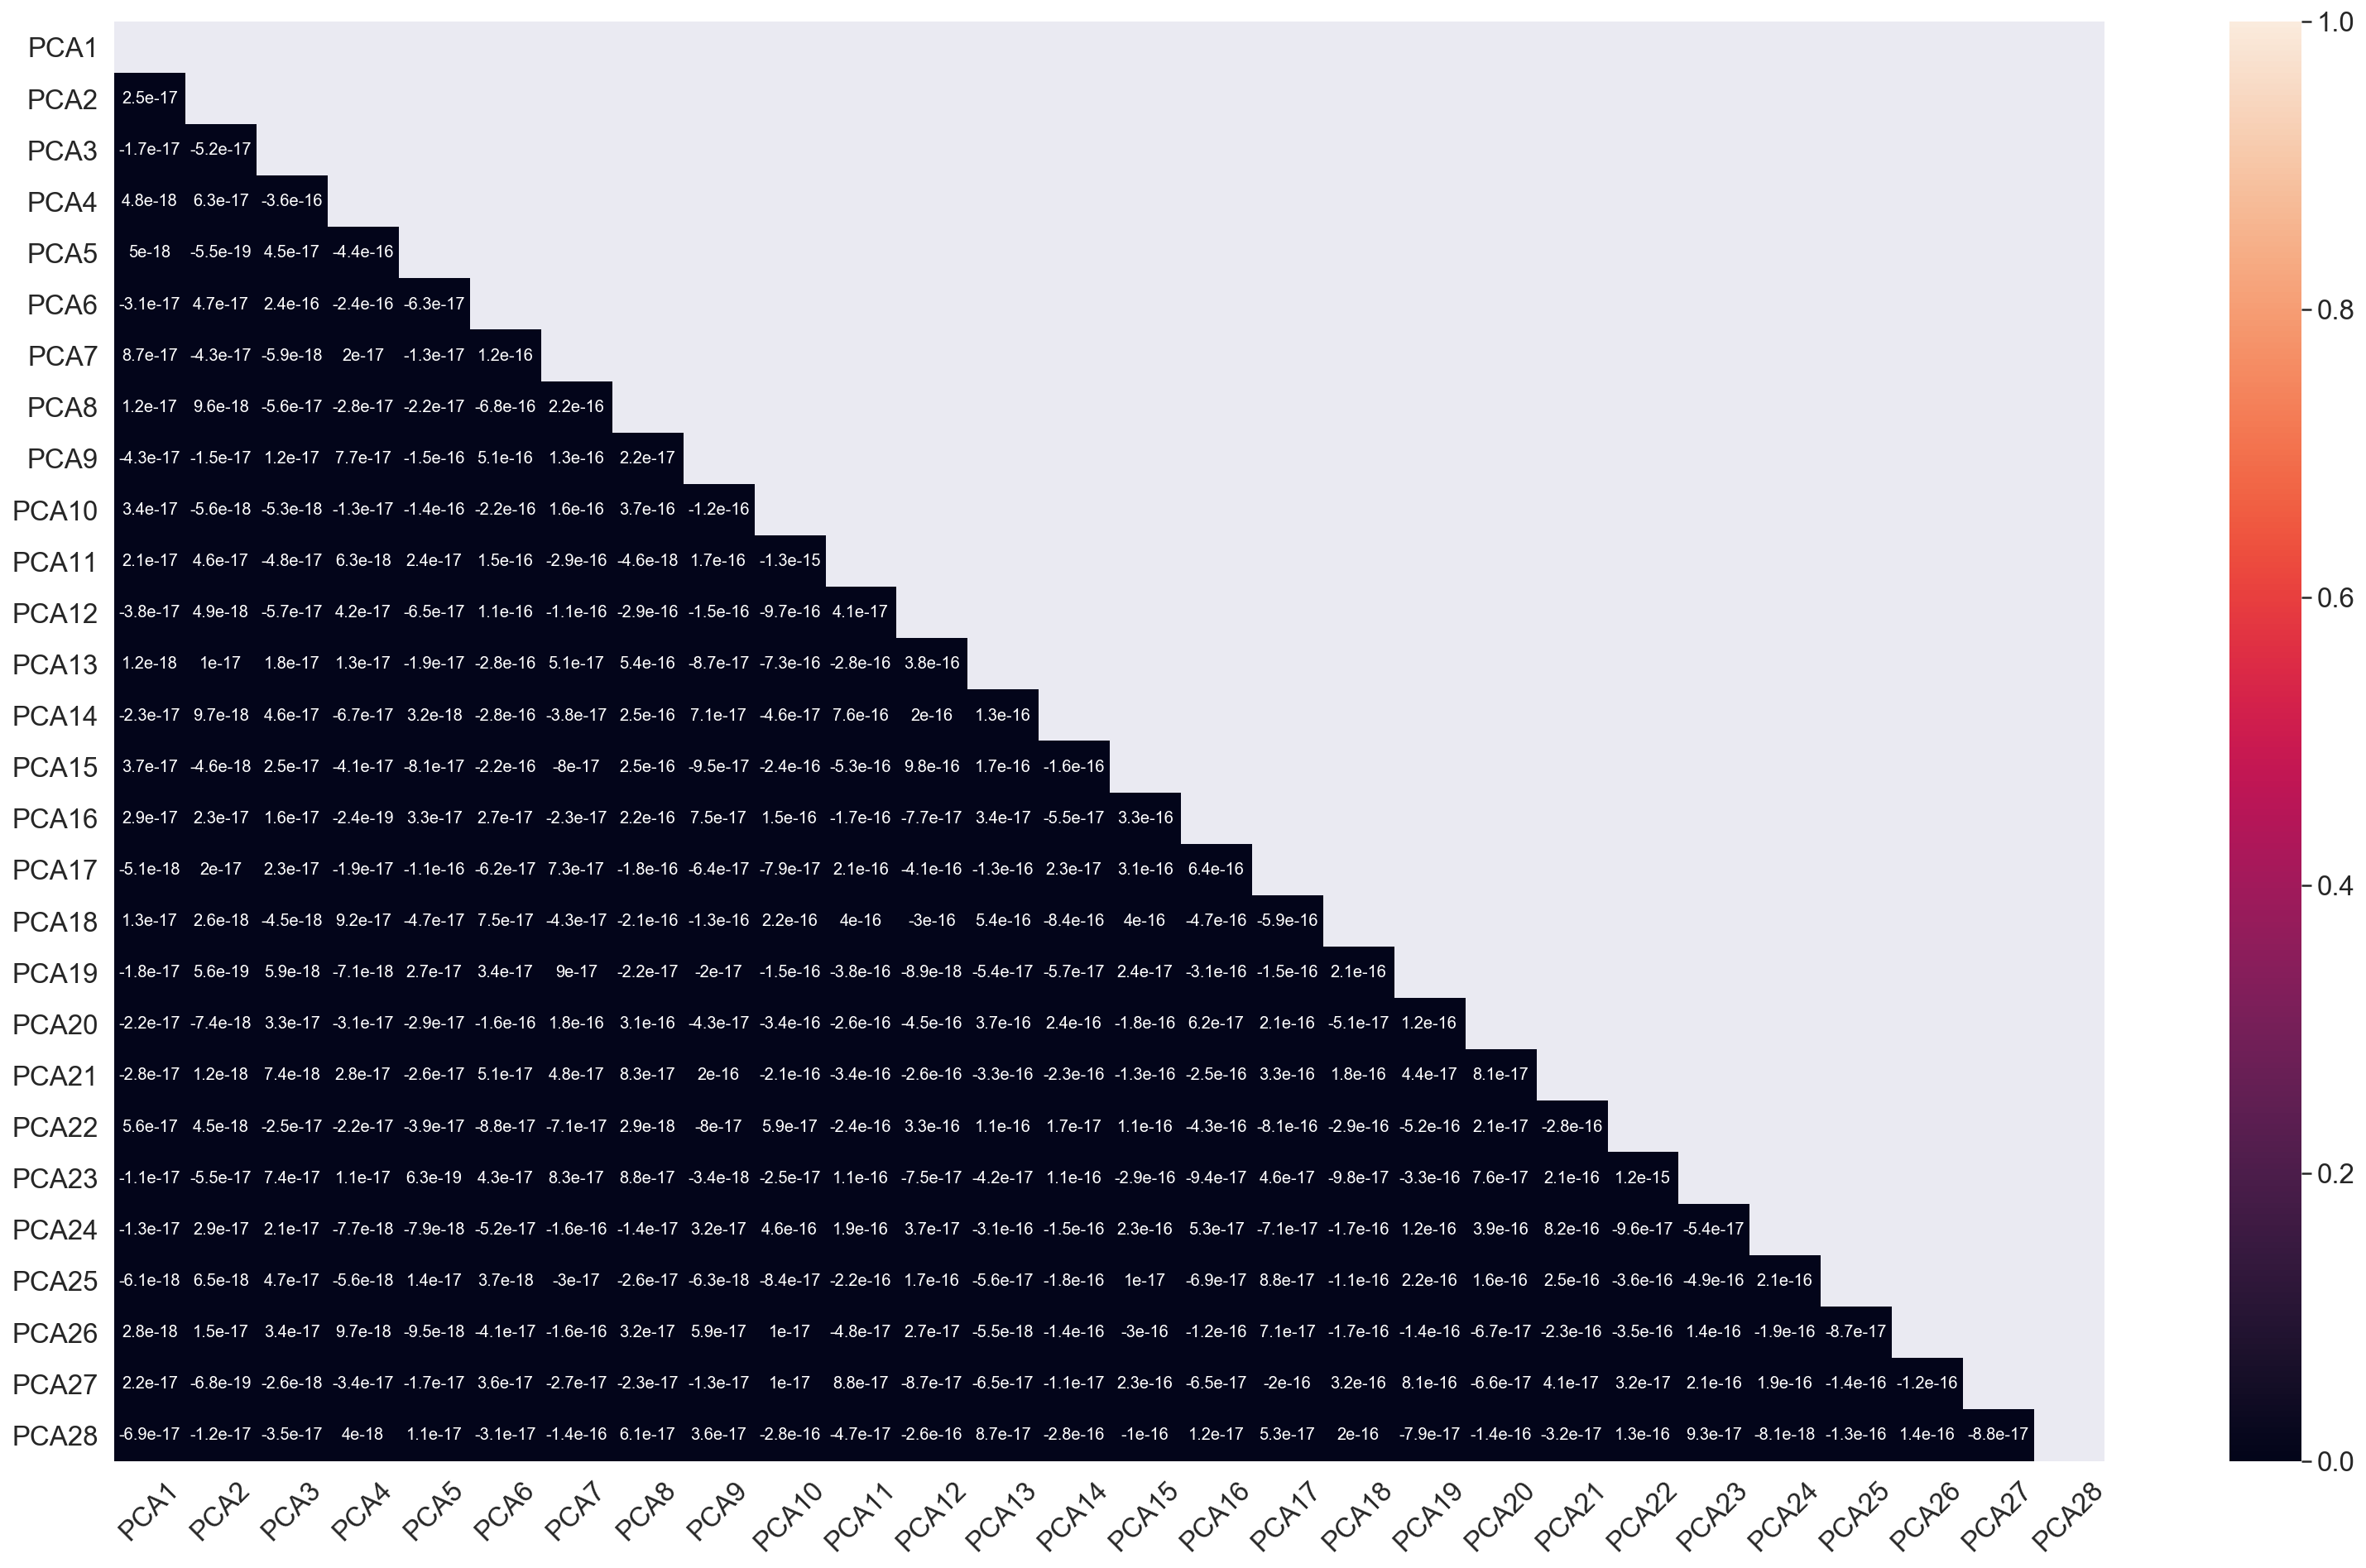

In [23]:
X_train_pca_corr = X_train_pca.corr()

mask = np.zeros_like(X_train_pca_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(24, 16))
ax = sns.heatmap(X_train_pca_corr, mask=mask, annot=True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), rotation=45)
ax.set_ylim(X_train_pca_corr.shape[1], 0)
plt.show()

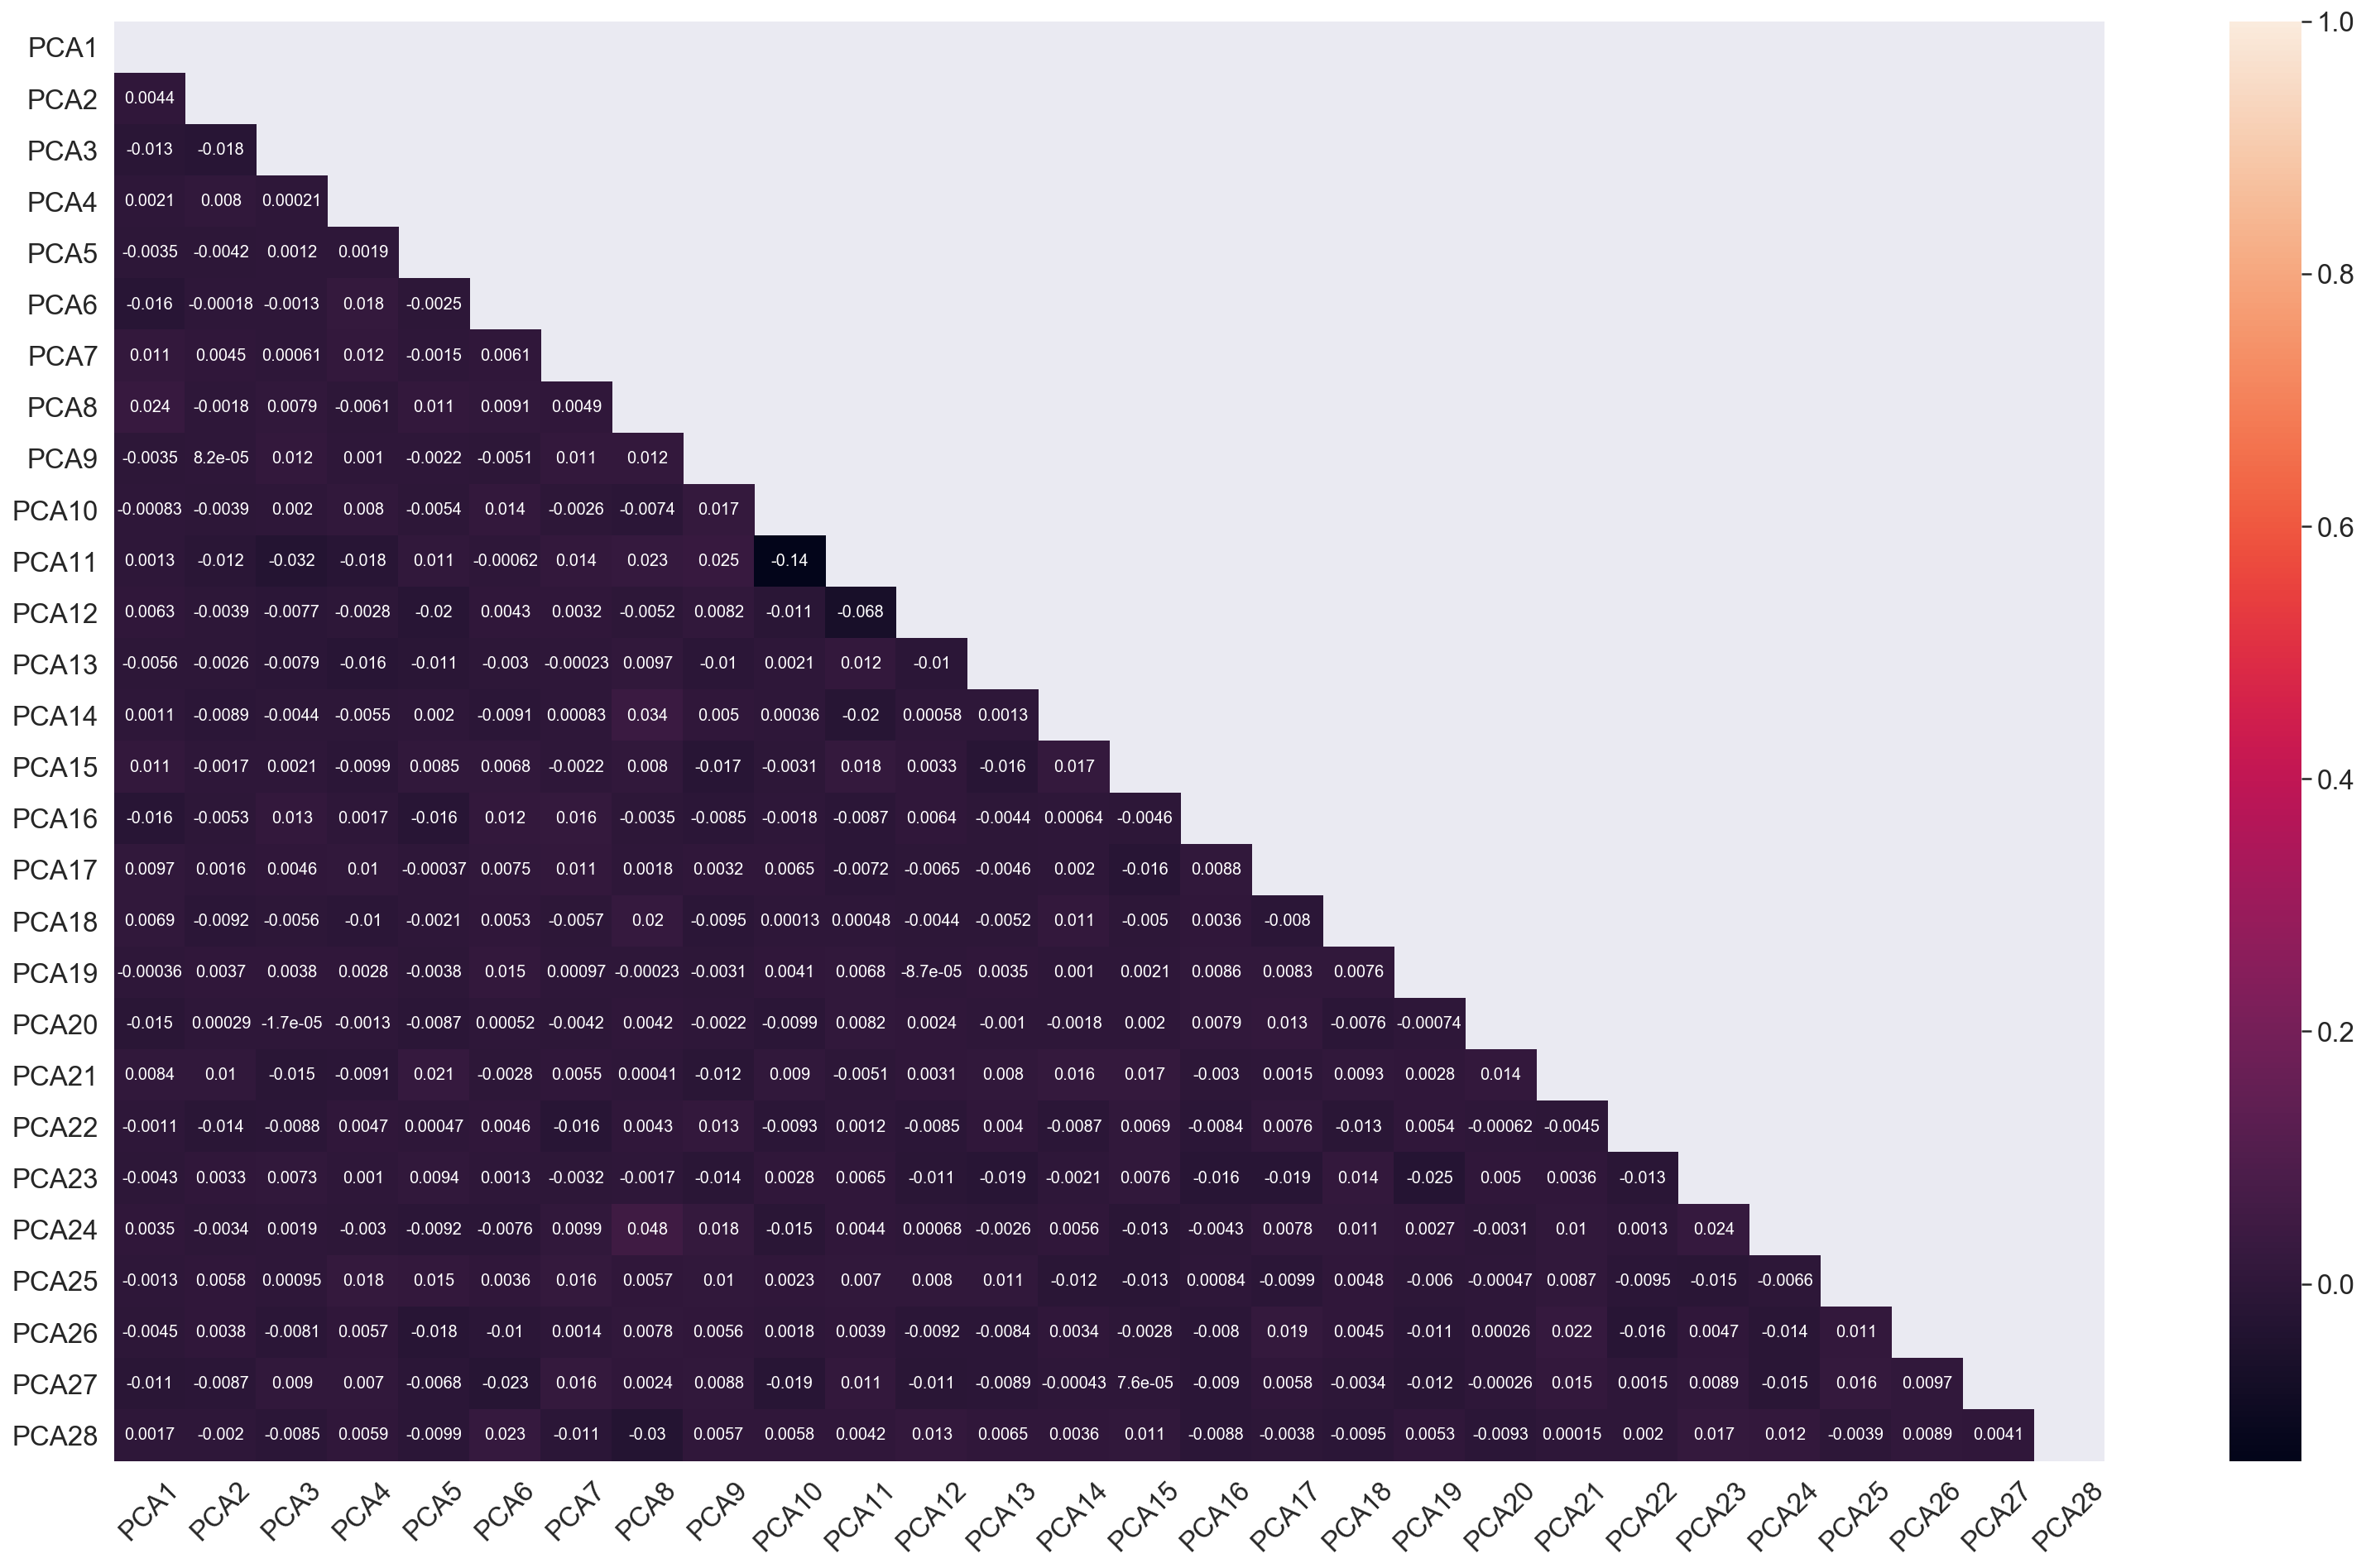

In [24]:
X_test_pca_corr = X_test_pca.corr()

mask = np.zeros_like(X_test_pca_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(24, 16))
ax = sns.heatmap(X_test_pca_corr, mask=mask, annot=True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), rotation=45)
ax.set_ylim(X_test_pca_corr.shape[1], 0)
plt.show()

### Building basic Logistic Regression model for readmission prediction

In [25]:
modelLR = LogisticRegression()

modelLR.fit(X_train_pca,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
print("Score(Train): ", modelLR.score(X_train_pca, y_train))
print("Cross Val Score (Train): ", cross_val_score(modelLR, X_train_pca, y_train, cv =5).mean()) 
print("Score (Test): ", modelLR.score(X_test_pca, y_test))

Score(Train):  0.7319764269344101
Cross Val Score (Train):  0.7319982576938111
Score (Test):  0.7379081543565567


In [27]:
importance = modelLR.coef_[0]

importanceDF = pd.DataFrame(importance, index=X_train_pca.columns, 
                          columns=["Importance"])
importanceDF.sort_values(by='Importance', ascending=False).head(15)

Importance
PCA18    0.018885
PCA10    0.017840
PCA21    0.016095
PCA22    0.012762
PCA4     0.011441
PCA23    0.011343
PCA13    0.009818
PCA8     0.009518
PCA16    0.007478
PCA3     0.007188
PCA11    0.007101
PCA14    0.003136
PCA17    0.003081
PCA27    0.003079
PCA7     0.002353

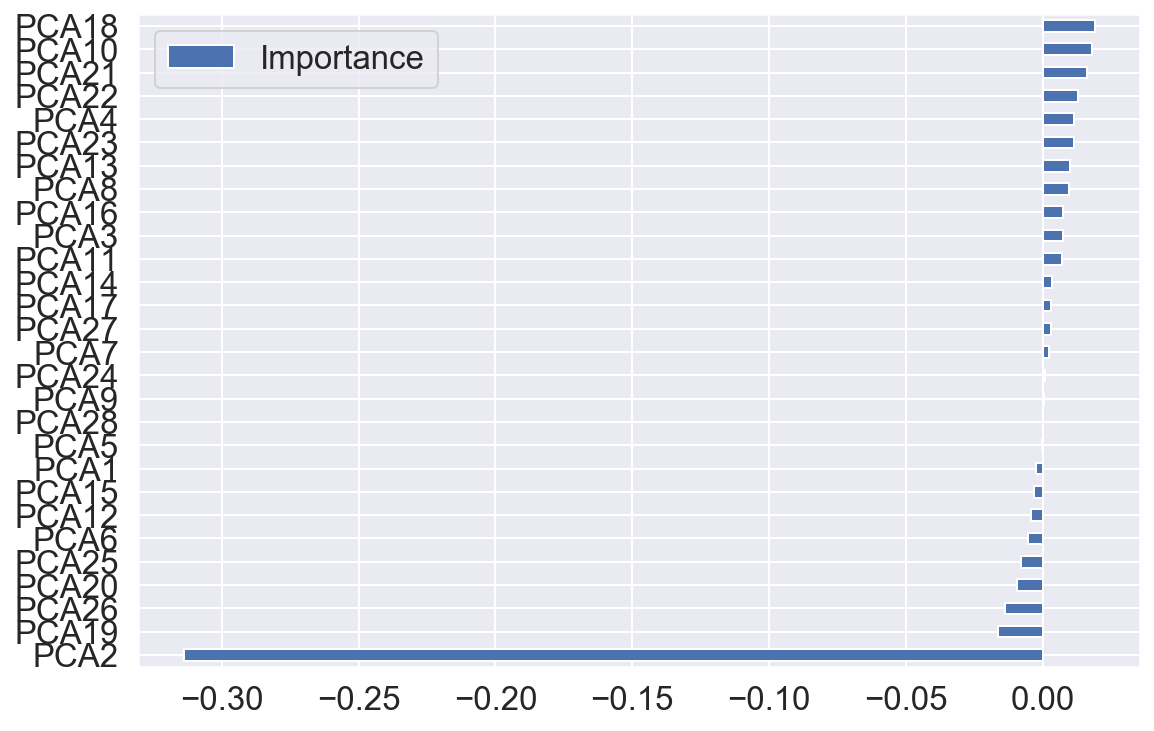

In [28]:
importanceDF.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(8, 6))
plt.show()

In [32]:
# Predictons and Probabilities

predictions_LRBase = modelLR.predict(X_test_pca)
predictions_LRBase

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
probabilities_LRBase = modelLR.predict_proba(X_test_pca)
probabilities_LRBase

array([[0.30803844, 0.69196156],
       [0.42401859, 0.57598141],
       [0.17282567, 0.82717433],
       ...,
       [0.14153433, 0.85846567],
       [0.21073286, 0.78926714],
       [0.42977674, 0.57022326]])

In [34]:
labels=[0, 1]
confusion_mat = confusion_matrix(y_test, predictions_LRBase, labels=labels) # it is imp to put labels else its confusing
#print(labels)
#print(confusion_mat)

pd.DataFrame(confusion_mat,
             columns=['Predicted_No_Readmissions', 'Predicted_Readmissions'],
             index=['True_No_Readmissions', 'True_Readmissions'])

Predicted_No_Readmissions  Predicted_Readmissions
True_No_Readmissions                        202                    4965
True_Readmissions                          1039                   16702

In [35]:
print(classification_report(y_test, predictions_LRBase))

              precision    recall  f1-score   support

           0       0.16      0.04      0.06      5167
           1       0.77      0.94      0.85     17741

    accuracy                           0.74     22908
   macro avg       0.47      0.49      0.46     22908
weighted avg       0.63      0.74      0.67     22908



In [36]:
def plot_f1_lines(figsize=(8,6),fontsize=16):
    '''Create f1-score level lines to be added to the precison-recall plot'''

    fig, ax = plt.subplots(figsize=figsize)
    
    # add lines of constant F1 scores
    
    for const in np.linspace(0.2,0.9,8):
        x_vals = np.linspace(0.001, 0.999, 100)
        y_vals = 1./(2./const-1./x_vals)
        ax.plot(x_vals[y_vals > 0], y_vals[y_vals > 0],
                 color='lightblue', ls='--', alpha=0.9)
        ax.set_ylim([0, 1])
        ax.annotate('f1={0:0.1f}'.format(const),
                     xy=(x_vals[-10], y_vals[-2]+0.0), fontsize=fontsize)

    return fig, ax

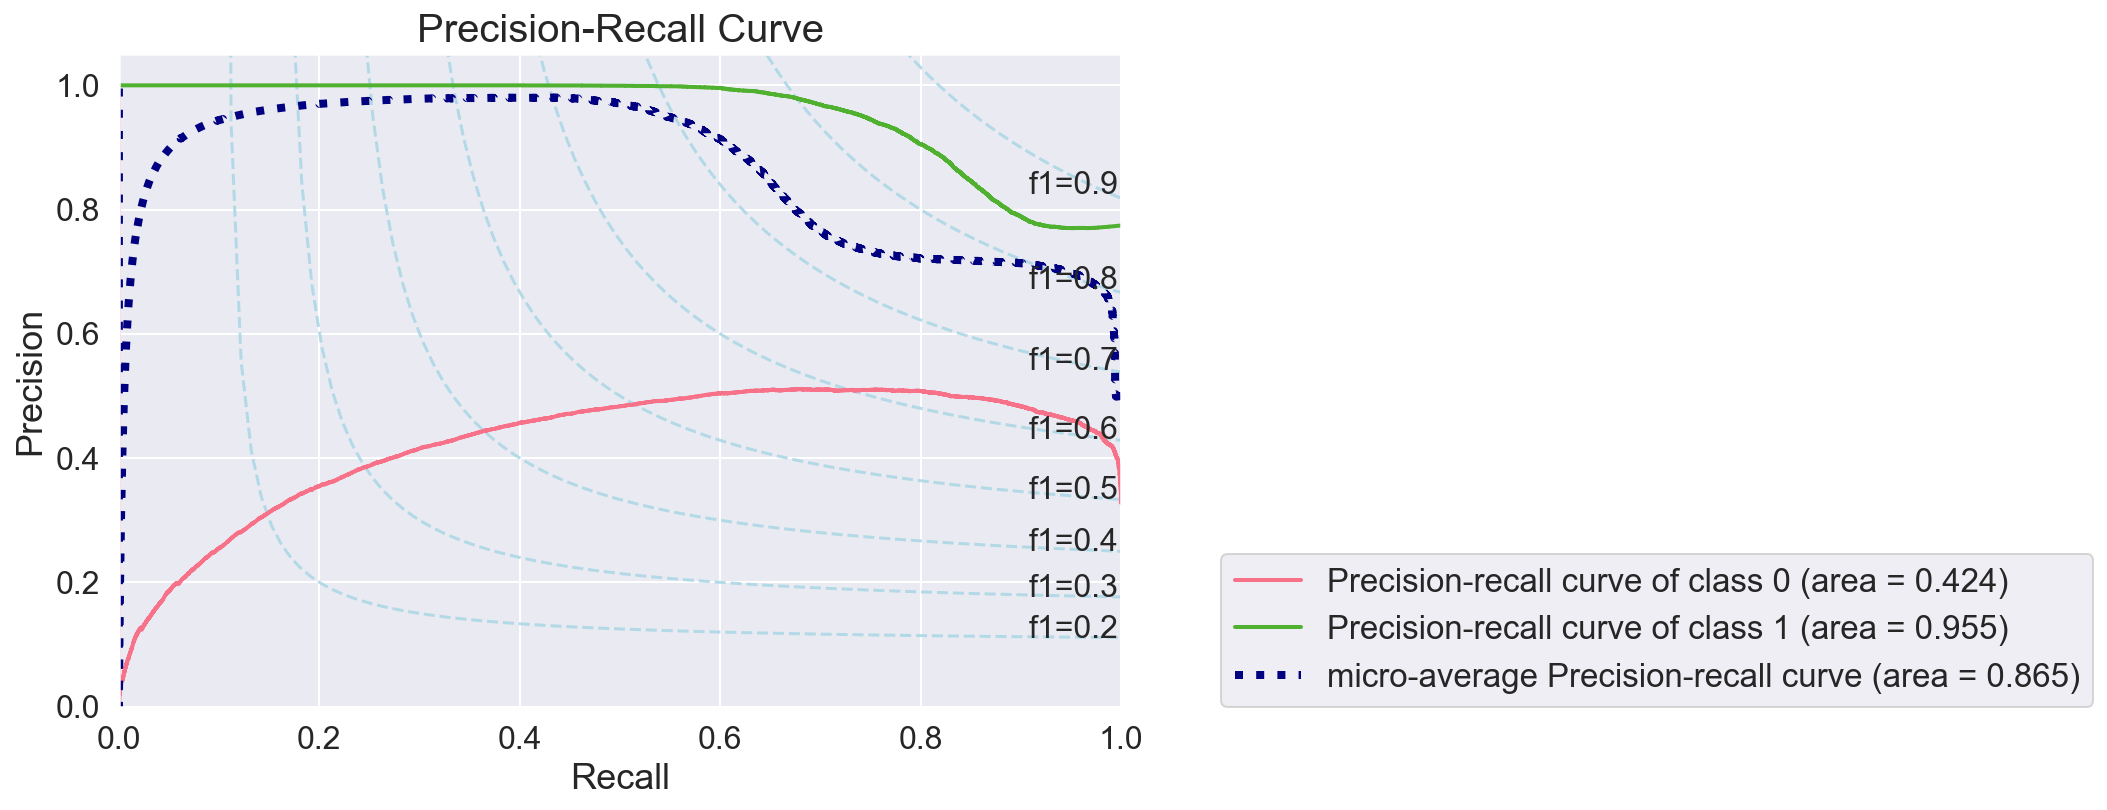

In [37]:
# plot_f1_lines # already defined

# Recall Precision plot

fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, probabilities_LRBase, 
                       plot_micro=True, 
                       title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1,0])
plt.show()

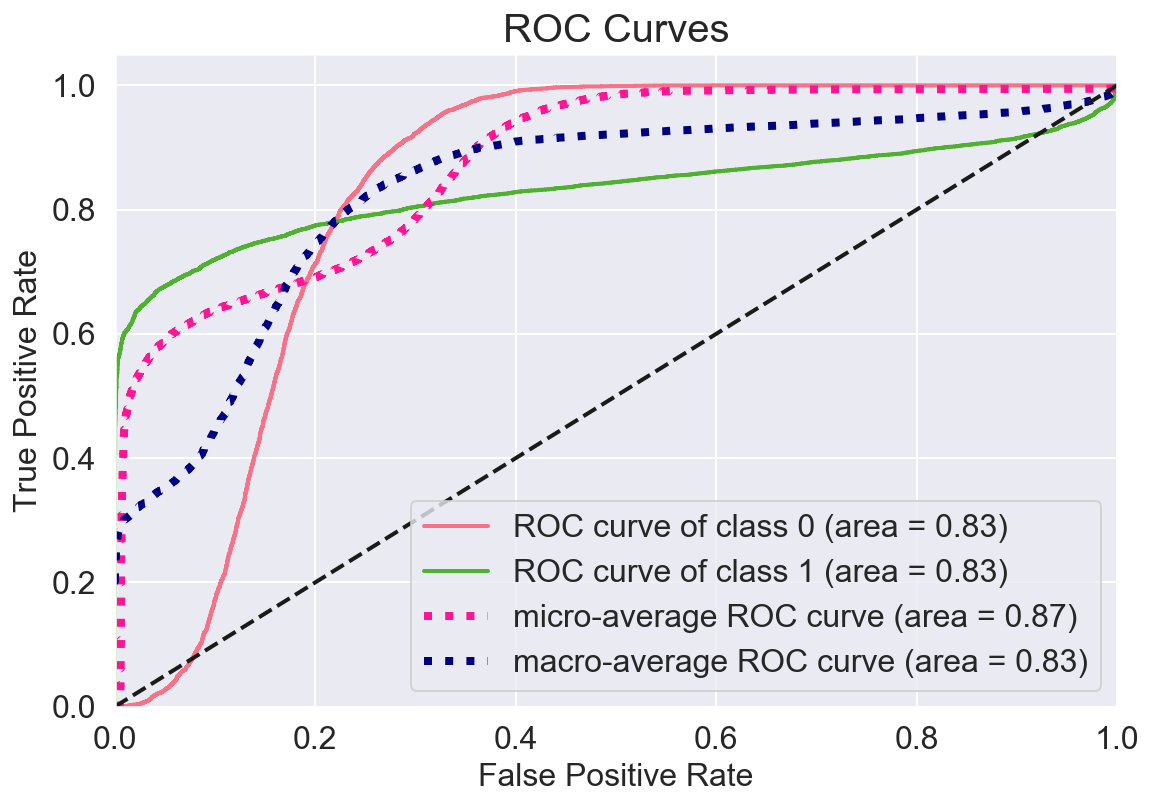

In [38]:
# ROC plot

skplt.metrics.plot_roc(y_test, probabilities_LRBase, plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(8,6), cmap=cmap)
plt.show()

### Random Forest

In [42]:
modelRF = RandomForestClassifier(n_estimators=100, criterion='gini')
modelRF.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
print("Score(Train): ", modelRF.score(X_train_pca, y_train))
print("Cross Val Score (Train): ", cross_val_score(modelRF, X_train_pca, y_train, cv =5).mean()) 
print("Score (Test): ", modelRF.score(X_test_pca, y_test))

Score(Train):  1.0
Cross Val Score (Train):  0.9432718529372724
Score (Test):  0.9421599441243234


In [ ]:
# Write function for diff models and grid search pipeline

LR,
KNN,
DT,
RF
SVM

In [ ]:
#week 5 day 1

pipe = Pipeline(steps=[('scaler', scaler),
                       ('model', model)])

pipe.fit(X, y)

columns_to_drop = ['PassengerId', 'Name']
columns_to_dummify = ['Sex', 'Pclass', 'Embarked']

tprep = TitanticPreprocessor(columns_to_drop=columns_to_drop,
                             columns_to_dummify=columns_to_dummify)
scaler = StandardScaler()
model = LogisticRegression(solver='lbfgs', random_state=1)

pipe = Pipeline(steps=[('titanic_prep', tprep),
                       ('scaler', scaler),
                       ('model', model)
                      ]
               )


scaler = StandardScaler()
#scaler = MinMaxScaler()
poly = PolynomialFeatures(include_bias=False)
model = LogisticRegression(solver='lbfgs')
#model = KNeighborsClassifier()
fu_pipe = Pipeline(steps=(('union', fu),
                          ('poly', poly),
                          ('scaler', scaler),
                          ('model', model)))

In [ ]:
# setup the grid search

params = {'C': np.logspace(-4, 4, 10),
          'penalty': ['l1', 'l2'],
          'fit_intercept': [True, False]}

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(X_train, y_train)

# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test, y_test))
print('Best estimator coefficients:')
print(gs.best_estimator_.coef_)

In [ ]:
# Can I find imp features (rev engg PCAs to real feature) - https://towardsdatascience.com/feature-extraction-using-principal-component-analysis-a-simplified-visual-demo-e5592ced100a

In [ ]:
# Can i do deeper analytics to find which diseases are mostly like for readmssion or mots/leat expenseive so that we 

# can target the low hanging fruits

In [ ]:
# Can i look at probablities and figure out the index and relate to the patient

In [ ]:
final2008_2009DF_selectedFeatures['READMIT7'].unique()

In [ ]:
final2008_2009DF_selectedFeatures['READMIT30'].unique()

In [ ]:
final2008_2009DF_selectedFeatures['READMIT60'].unique()

In [ ]:
final2008_2009DF_selectedFeatures['READMIT90'].unique()

In [ ]:
# do oversample for eda

# Class count
count_class_0, count_class_1 = final2008_2009DF_selectedFeatures['DEAD'].value_counts() #READMIT7_FLAG
count_class_0, count_class_1

In [ ]:
# Divide by class
df_class_0 = final2008_2009DF_selectedFeatures[final2008_2009DF_selectedFeatures['DEAD'] == 0]   
df_class_1 = final2008_2009DF_selectedFeatures[final2008_2009DF_selectedFeatures['DEAD'] == 1]
print(df_class_0.shape)
print(df_class_1.shape)

In [ ]:
# Oversampling class 1

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
final2008_2009DF_over = pd.concat([df_class_0, df_class_1_over], axis=0)
print(final2008_2009DF_over.shape)
final2008_2009DF_over.head()